# **Analyzing Movie Genre Performance <font color='Red'>Before and After <font color='Green'>COVID-19🦠</font></font>**

# <font color='orange'>Data Processing and Cleaning</font>

In [380]:
import os
import glob
import math
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import MonthEnd, DateOffset

In [3]:
os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5263 - Applied Microeconomics/Data Project/Data')

IMDb_title_basics = pd.read_csv('IMDb title basics.tsv', sep='\t', low_memory=False)
IMDb_Title_Principals = pd.read_csv('IMDb Title Principals.tsv', sep='\t', low_memory=False)
IMDb_title_ratings = pd.read_csv('IMDb title ratings.tsv', sep='\t', low_memory=False)
Name_Basics = pd.read_csv('Name Basics.tsv', sep='\t', low_memory=False)
title_akas = pd.read_csv('title.akas.tsv', sep='\t', low_memory=False)

<a name="_page0_x69.69_y423.22"></a>**IMDb Dataset Legend**

<Details>

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

<a name="_page0_x60.71_y555.04"></a>**title.akas.tsv.gz**

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title <a name="_page1_x60.71_y183.54"></a>**title.basics.tsv.gz**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.002.png) endYear (YYYY) – TV Series end year. ‘\N’ for all other title types ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.003.png) runtimeMinutes – primary runtime of the title, in minutes ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.004.png) genres (string array) – includes up to three genres associated with the title

<a name="_page1_x60.71_y549.05"></a>**title.crew.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

<a name="_page1_x60.71_y680.87"></a>**title.episode.tsv.gz**

- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

<a name="_page2_x60.71_y99.65"></a>**title.principals.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

<a name="_page2_x60.71_y321.35"></a>**title.ratings.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

<a name="_page2_x60.71_y453.18"></a>**name.basics.tsv.gz**

- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

### Cleaning IMDb_title_basics

In [4]:
IMDb_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### All columns

- <font color='Green'>tconst: Keep </font>

- <font color='Green'>titleType: Keep</font>

- <font color='Green'>primaryTitle: Keep</font>

- <font color='Red'>originalTitle: Drop</font>

- <font color='Green'>isAdult: Keep</font>

- <font color='Red'>startYear: Drop</font>

- <font color='Red'>endYear: Drop</font>

- <font color='Green'>runtimeMinutes: Keep</font>

- <font color='Green'>genres: Keep</font>

In [5]:
# Dropping unnecessary columns
IMDb_title_basics = IMDb_title_basics.drop(['originalTitle', 'endYear'], axis=1)

# Filtering for movies only
IMDb_title_basics = IMDb_title_basics[IMDb_title_basics['titleType'] == 'movie']

In [6]:
# Creating isAdult as a dummy variable
IMDb_title_basics['isAdult'] = IMDb_title_basics['isAdult'].replace(0, 'No')

In [7]:
IMDb_title_basics.head()    # 81,487 rows  7 columns   1.2 MB

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,0,1905,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,0,1907,90,Drama


--------

### Cleaning IMDb_Title_Principals

In [8]:
IMDb_Title_Principals.head()  # 3,911,728 rows  6 columns   1.1 GB

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


### All columns

- <font color='Green'>tconst: Keep</font>

- <font color='Green'>ordering: Keep</font>

- <font color='Green'>nconst: Keep</font>

- <font color='Green'>category: Keep</font>

- <font color='Red'>job: Drop</font>

- <font color='Red'>characters: Drop</font>

In [9]:
# Dropping unnecessary columns like job and characters
IMDb_Title_Principals = IMDb_Title_Principals.drop(['job', 'characters'], axis=1)

In [10]:
IMDb_Title_Principals.head()  # 3,911,728 rows  4 columns   1.1 GB

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0374658,cinematographer
3,tt0000002,1,nm0721526,director
4,tt0000002,2,nm1335271,composer


-----------

### Cleaning IMDb_title_ratings

In [11]:
IMDb_title_ratings.head()  # 1,058,804 rows  3 columns   27.5 MB   

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,270
2,tt0000003,6.5,1919
3,tt0000004,5.5,178
4,tt0000005,6.2,2696


----------

### Cleaning Name_Basics

In [12]:
Name_Basics.head()  # 9,007,366 rows  6 columns   1.1 GB

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050986,tt0050976,tt0083922"


### All columns

- <font color='Green'>nconst: Keep</font>

- <font color='Green'>primaryName: Keep</font>

- <font color='Red'>birthYear: Drop</font>

- <font color='Red'>deathYear: Drop</font>

- <font color='Green'>primaryProfession: Keep</font>

- <font color='Green'>knownForTitles: Keep</font>

In [13]:
# dropping unnecessary columns like birthYear, deathYear
Name_Basics = Name_Basics.drop(['birthYear', 'deathYear'], axis=1)

In [14]:
Name_Basics.head()  # 9,007,366 rows  4 columns   1.1 GB

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,"writer,director,actor","tt0069467,tt0050986,tt0050976,tt0083922"


----------

### Cleaning title_akas

In [15]:
title_akas.head()   # 30,000,000 rows  8 columns   2.5 GB

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


### All columns

- <font color='Green'>titleId: Keep</font>

- <font color='Green'>ordering: Keep</font>

- <font color='Red'>title: Drop</font>

- <font color='Green'>region: Keep</font>

- <font color='Green'>language: Keep</font>

- <font color='Green'>types	: Keep</font>

- <font color='Red'>attributes: Drop</font>

- <font color='Red'>isOriginalTitle: Drop</font>

In [16]:
# dropping unnecessary columns like title, isOriginalTitle and attributes
title_akas = title_akas.drop(['title', 'isOriginalTitle', 'attributes'], axis=1)

# rename the titleId column to tconst
title_akas = title_akas.rename(columns={'titleId': 'tconst'})

In [17]:
title_akas.head()   # 30,000,000 rows  5 columns   2.5 GB

,tconst,ordering,region,language,types
0,tt0000001,1,UA,\N,imdbDisplay
1,tt0000001,2,DE,\N,\N
2,tt0000001,3,HU,\N,imdbDisplay
3,tt0000001,4,GR,\N,imdbDisplay
4,tt0000001,5,RU,\N,imdbDisplay


### Merging IMDb dataset

In [18]:
# Merge the necessary columns from IMDb_title_basics with ratings on 'tconst'
merged_df = pd.merge(IMDb_title_basics[['tconst', 'startYear', 'titleType', 'primaryTitle', 'genres', 'runtimeMinutes', 'isAdult']], IMDb_title_ratings[['tconst', 'averageRating']], on='tconst', how='left')

# Merge with akas to get 'region', then group by 'tconst' to combine regions into a list
regions_df = title_akas.groupby('tconst')['region'].apply(lambda x: ', '.join(x.dropna().astype(str).unique())).reset_index()

# Merge with regions
merged_df = pd.merge(merged_df, regions_df, on='tconst', how='left')

# Merge with principals to get 'nconst'
principals_df = pd.merge(merged_df, IMDb_Title_Principals[['tconst', 'nconst']], on='tconst', how='left')

# Merge principals with name basics to get 'primaryName' and 'primaryProfession'
# Instead of exploding 'knownForTitles', we join them into a single string
Name_Basics['knownForTitles'] = Name_Basics['knownForTitles'].apply(lambda x: ','.join(map(str, x)))

# Then merge to get the names and professions associated with each 'nconst'
principals_with_names = pd.merge(principals_df, Name_Basics[['nconst', 'primaryName', 'primaryProfession', 'knownForTitles']], on='nconst', how='left')

# Filter for rows where 'primaryProfession' contains 'director'
directors_df = principals_with_names[principals_with_names['primaryProfession'].str.contains('director', na=False)]

# Group by 'tconst' and aggregate 'primaryName' into a list for director entries
director_names_df = directors_df.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x.dropna().astype(str).unique())).reset_index()

# Merge the director names with the directors dataframe
directors_df = pd.merge(directors_df, director_names_df, on='tconst', how='left', suffixes=('', '_directors'))

# Now select only the columns specified and rename 'primaryName_directors' back to 'primaryName'
directors_df = directors_df[['titleType', 'primaryTitle', 'genres', 'primaryName_directors', 'primaryProfession', 'averageRating', 'region', 'runtimeMinutes', 'isAdult', 'tconst', 'startYear']]
directors_df = directors_df.rename(columns={"primaryName_directors": "primaryName"})

# Group by the necessary columns and aggregate to combine regions into a list
IMDb_df = directors_df.groupby(['titleType', 'primaryTitle', 'genres', 'primaryName', 'primaryProfession', 'averageRating', 'runtimeMinutes', 'isAdult', 'tconst', 'startYear']).agg({'region': lambda x: ', '.join(str(i) for i in x)}).reset_index()

# In final_df keeping only one of the values where the primaryTitle and averageRating are the same for multiple rows.
IMDb_df = IMDb_df.drop_duplicates(subset=['primaryTitle', 'averageRating'], keep='first')

In [779]:
IMDb_df.head()

,titleType,primaryTitle,genres,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region
0,movie,!Women Art Revolution,Documentary,Lynn Hershman-Leeson,"director,producer,writer",6.8,83,0,tt1699720,2010,"XWW, RU, GB, \N, US"
1,movie,#1 Serial Killer,Horror,"Jason Tobin, Shoshana Bush, Stanley Yung, Quen...","actor,director,writer",5.7,87,0,tt2346170,2013,"\N, US"
5,movie,#5,"Biography,Comedy,Fantasy",Ricky Bardy,"producer,director,editor",5.0,68,0,tt3120962,2013,"\N, US"
6,movie,#50Fathers,Comedy,"Joddy Eric Matthews, Denny Castiglione, Jay B....","actor,producer,assistant_director",4.3,132,0,tt4470336,2015,"\N, US"
10,movie,#66,Action,Asun Mawardi,"producer,director,writer",5.6,116,0,tt5255986,2015,"GB, ID, \N"


In [780]:
IMDb_df.count()

titleType            293497
primaryTitle         293497
genres               293497
primaryName          293497
primaryProfession    293497
averageRating        293497
runtimeMinutes       293497
isAdult              293497
tconst               293497
startYear            293497
region               293497
dtype: int64

# The final IMDb dataset name is <span style="color:Red">IMDb_df</span> 

-------

### Loading and cleaning Revenues Dataset

In [781]:
# Define the path to the files
path_to_files = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5813 - Economic Analytics I/Project Proposal/Data/Gross Data/'

# Initialize an empty DataFrame for the Revenues_dataset
Revenues_dataset = pd.DataFrame()

# Define a helper function to extract the year from the filename
def get_year_from_filename(file_name):
    for month in ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]:
        if month in file_name:
            return file_name.split(month)[1].strip('.csv').strip()
    return None

# Loop through each CSV file in the directory
for file_name in os.listdir(path_to_files):
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(path_to_files, file_name)
        # Read the CSV file into a temporary DataFrame
        temp_df = pd.read_csv(file_path)
        # Extract the year from the file name
        year = get_year_from_filename(file_name)
        if year:
            # Assume that 'Release Date' column contains the day and abbreviated month (e.g., '17-Feb')
            # If day is missing, we'll prepend '01-' to use as a placeholder
            temp_df['Release Date'] = temp_df['Release Date'].str.extract(r'(\d+)-[A-Za-z]+', expand=False).fillna('01') + '-' + temp_df['Release Date'].str.extract(r'(\d+-)?([A-Za-z]+)', expand=False)[1] + '-' + year
            # Convert 'Release Date' to datetime format
            temp_df['Release Date'] = pd.to_datetime(temp_df['Release Date'], format='%d-%b-%Y', errors='coerce')
            # Drop rows where 'Release Date' could not be parsed
            temp_df.dropna(subset=['Release Date'], inplace=True)
            # Format 'Release Date' as 'MM/YYYY'
            temp_df['Release Date'] = temp_df['Release Date'].dt.strftime('%m/%Y')
            # Append to the main DataFrame
            Revenues_dataset = pd.concat([Revenues_dataset, temp_df], ignore_index=True)

# Remove rows with NaN 'Release Date' before dropping duplicates
Revenues_dataset.dropna(subset=['Release Date'], inplace=True)

# Drop duplicates based on the 'Release' column
Revenues_dataset = Revenues_dataset.drop_duplicates(subset='Release')

# Drop the unnecessary 'Rank' and 'Gross' columns
Revenues_dataset.drop(['Rank', 'Gross'], axis=1, inplace=True)

# Drop rows with null values in 'Total Gross'
Revenues_dataset = Revenues_dataset.dropna(subset=['Total Gross'])

Revenues_dataset.head()

,Release,Theaters,Total Gross,Release Date,Distributor
0,It Chapter Two,"4,570","$211,593,228",09/2019,Warner Bros.
1,Hustlers,"3,525","$104,963,598",09/2019,STX Entertainment
2,Downton Abbey,"3,548","$96,853,865",09/2019,Focus Features
3,Ad Astra,"3,460","$50,188,370",09/2019,Twentieth Century Fox
4,Rambo: Last Blood,"3,618","$44,819,352",09/2019,Lions Gate Films


In [782]:
# Separate the 'Release Date' column into 'Start Year' column
Revenues_dataset['Start Year'] = Revenues_dataset['Release Date'].str.extract(r'\d+/(\d+)', expand=False)

In [783]:
Revenues_dataset.head()

,Release,Theaters,Total Gross,Release Date,Distributor,Start Year
0,It Chapter Two,"4,570","$211,593,228",09/2019,Warner Bros.,2019
1,Hustlers,"3,525","$104,963,598",09/2019,STX Entertainment,2019
2,Downton Abbey,"3,548","$96,853,865",09/2019,Focus Features,2019
3,Ad Astra,"3,460","$50,188,370",09/2019,Twentieth Century Fox,2019
4,Rambo: Last Blood,"3,618","$44,819,352",09/2019,Lions Gate Films,2019


# The final Revenues and Distributor dataset name is <span style="color:Red">Revenues_dataset</span> 

------

### Merging <span style="color:SkyBlue">IMDb_df</span> and <span style="color:SkyBlue">Revenues_dataset</span>

In [784]:
# Merge IMDb_df and Revenues_dataset if the StartYear and primaryTitle match the Release and Start Year respectively on the IMDb_df dataset. So if the primaryTitle is Avengers: Endgame and the StartYear is 2019, then the Release should be Avengers: Endgame and the Start Year should be 2019.
combined_data = pd.merge(IMDb_df, Revenues_dataset, left_on=['primaryTitle', 'startYear'], right_on=['Release', 'Start Year'], how='inner')
combined_data.head()

,titleType,primaryTitle,genres,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,Release,Theaters,Total Gross,Release Date,Distributor,Start Year
0,movie,'83,"Biography,Drama,History","Kabir Khan, Sumit Arora, Vasan Bala, Sanjay Pu...","director,writer,actor",7.5,162,0,tt7518786,2021,"AR, \N, NZ, TR, IN, CN, CA, AE, PT, FR, ID, XW...",'83,486,"$4,055,660",12/2021,Reliance Entertainment,2021
1,movie,10 Cloverfield Lane,"Drama,Horror,Mystery","Dan Trachtenberg, Damien Chazelle","music_department,director,writer",7.2,103,0,tt1179933,2016,"SG, RO, CN, SI, CL, GR, SE, PT, VN, BG, UY, GB...",10 Cloverfield Lane,"3,427","$72,082,998",03/2016,Paramount Pictures,2016
2,movie,10 Days in a Madhouse,"Drama,History","Aaron R.F. Anderson, Timothy Hines, Andrew Mal...","actor,producer,director",5.7,111,0,tt3453052,2015,"AU, BR, US, \N, FR, GB, RU",10 Days in a Madhouse,10,"$14,616",11/2015,-,2015
3,movie,10 Days with Dad,"Comedy,Family","Romain Brémond, Aure Atika, Alexis Michalik, L...","actor,writer,director",5.4,104,0,tt10251538,2020,"HU, US, PT, DE, RO, \N, TR, SE, UA, CA, RU, BG...",10 Days with Dad,1,"$2,359",11/2020,Distrib Films,2020
4,movie,100 Acres of Hell,"Action,Crime,Horror","Ernest O'Donnell, Hank Leigh Hump","actor,producer,director",3.2,85,0,tt2789014,2019,"BR, CA, \N, IT, GB, US",100 Acres of Hell,1,"$5,152",10/2019,Indican Pictures,2019


In [785]:
# Delete duplicate rows where the Release and Total gross match other rows
combined_data = combined_data.drop_duplicates(subset=['Release', 'Total Gross'], keep='first')

# Filter combined_data if US is not in the region column
combined_data = combined_data[combined_data['region'].str.contains('US', case=False, na=False)]

# Remove null values from Release Date column
combined_data = combined_data.dropna(subset=['Release Date'])

In [786]:
# Duplicate the genre column and call it genre_2
combined_data['genre_2'] = combined_data['genres']

# In Genres column delete all the genres except the first one
combined_data['genres'] = combined_data['genres'].str.split(',', expand=True)[0]

In [787]:
# Cleaning the format type for Total Gross
combined_data['Total Gross'] = combined_data['Total Gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Reset the index
combined_data = combined_data.reset_index(drop=True)

In [788]:
# all unique values in isAdult column
combined_data['isAdult'].unique()

array(['0'], dtype=object)

In [789]:
# Replace 'True' with 1
combined_data['isAdult'] = combined_data['isAdult'].replace(True, 1)

# Replace null values with 0
combined_data['isAdult'] = combined_data['isAdult'].fillna(0)

In [790]:
# Changing data types
combined_data['runtimeMinutes'] = pd.to_numeric(combined_data['runtimeMinutes'], errors='coerce').astype('Int64')

In [791]:
# separating the genres column into different columns
combined_data = combined_data.join(combined_data.pop('genres').str.get_dummies(sep=','))

In [792]:
# Dropping Theaters due to a lot of null values
if 'Theaters' in combined_data.columns:
    combined_data = combined_data.drop(['Theaters'], axis=1)

In [793]:
combined_data.head()

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,\N
0,movie,'83,"Kabir Khan, Sumit Arora, Vasan Bala, Sanjay Pu...","director,writer,actor",7.5,162,0,tt7518786,2021,"AR, \N, NZ, TR, IN, CN, CA, AE, PT, FR, ID, XW...",...,0,0,0,0,0,0,0,0,0,0
1,movie,10 Cloverfield Lane,"Dan Trachtenberg, Damien Chazelle","music_department,director,writer",7.2,103,0,tt1179933,2016,"SG, RO, CN, SI, CL, GR, SE, PT, VN, BG, UY, GB...",...,0,0,0,0,0,0,0,0,0,0
2,movie,10 Days in a Madhouse,"Aaron R.F. Anderson, Timothy Hines, Andrew Mal...","actor,producer,director",5.7,111,0,tt3453052,2015,"AU, BR, US, \N, FR, GB, RU",...,0,0,0,0,0,0,0,0,0,0
3,movie,10 Days with Dad,"Romain Brémond, Aure Atika, Alexis Michalik, L...","actor,writer,director",5.4,104,0,tt10251538,2020,"HU, US, PT, DE, RO, \N, TR, SE, UA, CA, RU, BG...",...,0,0,0,0,0,0,0,0,0,0
4,movie,100 Acres of Hell,"Ernest O'Donnell, Hank Leigh Hump","actor,producer,director",3.2,85,0,tt2789014,2019,"BR, CA, \N, IT, GB, US",...,0,0,0,0,0,0,0,0,0,0


In [794]:
# null values in each column
combined_data.isnull().sum()

titleType             0
primaryTitle          0
primaryName           0
primaryProfession     0
averageRating         0
runtimeMinutes       10
isAdult               0
tconst                0
startYear             0
region                0
Release               0
Total Gross           0
Release Date          0
Distributor           0
Start Year            0
genre_2               0
Action                0
Adventure             0
Animation             0
Biography             0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
\N                    0
dtype: int64

In [795]:
combined_data.count()

titleType            2980
primaryTitle         2980
primaryName          2980
primaryProfession    2980
averageRating        2980
runtimeMinutes       2970
isAdult              2980
tconst               2980
startYear            2980
region               2980
Release              2980
Total Gross          2980
Release Date         2980
Distributor          2980
Start Year           2980
genre_2              2980
Action               2980
Adventure            2980
Animation            2980
Biography            2980
Comedy               2980
Crime                2980
Documentary          2980
Drama                2980
Family               2980
Fantasy              2980
History              2980
Horror               2980
Music                2980
Musical              2980
Mystery              2980
Romance              2980
Sci-Fi               2980
Sport                2980
Thriller             2980
War                  2980
\N                   2980
dtype: int64

<a name="_page0_x69.69_y423.22"></a>**Data Dictionary for combined_data dataset**

<Details>

1. **titleType**: The type of title (e.g., movie, TV show, etc.).
2. **primaryTitle**: The primary title of the movie or show.
3. **primaryName**: Names of primary individuals associated with the title, such as directors, writers, and actors.
4. **primaryProfession**: Primary professions of the individuals associated with the title.
5. **averageRating**: The average rating of the title.
6. **runtimeMinutes**: The runtime of the title in minutes.
7. **isAdult**: Indicator if the title is adult content (1 for yes, 0 for no).
8. **tconst**: A unique identifier for the title.
9. **startYear**: The year the title was released or started.
10. **region**: Regions where the title was released or is available.
11. **[genres]**: The dataset seems to have multiple columns for different genres like Drama, Comedy, etc., with binary indicators (1 for yes, 0 for no) representing if the title belongs to that genre.
12. **\N**: This column appears to be a binary indicator, possibly for an unspecified category or data not available.


# Creating dataset for movies before and after covid 🦠
-------

###  Before covid

In [796]:
# Create new dataframe that filters the data for all release date before 01/2020
before_covid_df = combined_data[combined_data['startYear'] < '2020']

In [797]:
before_covid_df.tail()

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,\N
2973,movie,Zombieland: Double Tap,"Abigail Breslin, Ruben Fleischer, Gavin Polone","actress,director,soundtrack",6.7,99,0,tt1560220,2019,"CO, RU, US, PH, CZ, KZ, TW, UA, TH, GB, HR, PE...",...,0,0,0,0,0,0,0,0,0,0
2974,movie,Zoo Wars,Evan Tramel,"director,producer,writer",2.4,70,0,tt7575410,2018,"AU, \N, GB, US",...,0,0,0,0,0,0,0,0,0,0
2975,movie,Zoolander 2,"Ben Stiller, Nicholas Stoller, John Hamburg","producer,actor,director",4.7,101,0,tt1608290,2016,"\N, IN, BR, ZA, SE, AR, RU, BG, FR, CN, PH, HU...",...,0,0,0,0,0,0,0,0,0,0
2976,movie,Zootopia,"Jason Bateman, Byron Howard, Rich Moore, Jim R...","actor,producer,director",8.0,108,0,tt2948356,2016,"ZA, BJ, FI, SI, BR, TW, SK, UY, XWW, SE, DK, R...",...,0,0,0,0,0,0,0,0,0,0
2977,movie,xXx: Return of Xander Cage,"Vin Diesel, D.J. Caruso, Joe Roth","director,producer,writer",5.2,107,0,tt1293847,2017,"IN, UA, \N, UY, IL, BR, TW, AU, IT, US, SK, CZ...",...,0,0,0,0,0,0,0,0,0,0


In [798]:
before_covid_df.count()

titleType            2206
primaryTitle         2206
primaryName          2206
primaryProfession    2206
averageRating        2206
runtimeMinutes       2201
isAdult              2206
tconst               2206
startYear            2206
region               2206
Release              2206
Total Gross          2206
Release Date         2206
Distributor          2206
Start Year           2206
genre_2              2206
Action               2206
Adventure            2206
Animation            2206
Biography            2206
Comedy               2206
Crime                2206
Documentary          2206
Drama                2206
Family               2206
Fantasy              2206
History              2206
Horror               2206
Music                2206
Musical              2206
Mystery              2206
Romance              2206
Sci-Fi               2206
Sport                2206
Thriller             2206
War                  2206
\N                   2206
dtype: int64

###  After covid

In [799]:
# Create new dataframe that filters the data for all release dates after 01/2020
after_covid_df = combined_data[combined_data['startYear'] > '2021']
after_covid_df.tail()

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,\N
2954,movie,X,Ti West,"director,writer,editor",6.5,105,0,tt13560574,2022,"IT, IN, ZA, CN, KZ, SE, MX, FR, DE, TW, HR, KR...",...,1,0,0,0,0,0,0,0,0,0
2961,movie,Yashoda,"Samantha Ruth Prabhu, Varalaxmi Sarathkumar, H...","actress,director",6.6,135,0,tt15710136,2022,"IL, IT, SE, PH, AE, US, TH, IN, CA, ID, NL, DE...",...,0,0,0,0,0,0,0,0,0,0
2963,movie,You Won't Be Alone,"Alice Englert, Goran Stolevski, Matthew Chuang","actress,director,writer",6.4,108,0,tt8296030,2022,"EG, PT, CA, IT, HK, JP, \N, IN, AU, TR, TW, TH...",...,0,0,0,0,0,0,0,0,0,0
2978,movie,¡Que viva México!,"Salvador Parra, Luis Estrada","production_designer,art_director,art_department",5.5,191,0,tt22185848,2023,"FR, EG, IN, AU, PH, JP, NL, GB, PL, TH, KR, \N...",...,0,0,0,0,0,0,0,0,0,0
2979,movie,¡Viva Maestro!,"Richard Pearce, Ted Braun","director,cinematographer,producer",7.2,99,0,tt14153448,2022,"CA, \N, US, BR, TR",...,0,0,0,0,0,0,0,0,0,0


In [800]:
after_covid_df.count()

titleType            368
primaryTitle         368
primaryName          368
primaryProfession    368
averageRating        368
runtimeMinutes       365
isAdult              368
tconst               368
startYear            368
region               368
Release              368
Total Gross          368
Release Date         368
Distributor          368
Start Year           368
genre_2              368
Action               368
Adventure            368
Animation            368
Biography            368
Comedy               368
Crime                368
Documentary          368
Drama                368
Family               368
Fantasy              368
History              368
Horror               368
Music                368
Musical              368
Mystery              368
Romance              368
Sci-Fi               368
Sport                368
Thriller             368
War                  368
\N                   368
dtype: int64

# <font color='Orange'>Exploratory Data Analysis</font>

## Summary Statistics

### Summary Statistics for combined_data

In [801]:
# Summary statistics for combined_data
combined_data.describe(include='all')

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,\N
count,2980,2980,2980,2980,2980.000000,2970.0,2980,2980,2980,2980,...,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000,2980.000000
unique,1,2980,2915,370,NaN,<NA>,1,2980,10,2840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,movie,'83,Hiroshi Akabane,"actor,producer,director",NaN,<NA>,0,tt7518786,2018,"\N, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2980,1,3,363,NaN,<NA>,2980,1,401,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.296376,107.700337,NaN,NaN,NaN,NaN,...,0.034564,0.003691,0.004027,0.003020,0.003020,0.000671,0.000671,0.004698,0.000336,0.000671
std,NaN,NaN,NaN,NaN,1.110280,20.367169,NaN,NaN,NaN,NaN,...,0.182703,0.060654,0.063340,0.054882,0.054882,0.025902,0.025902,0.068392,0.018319,0.025902
min,NaN,NaN,NaN,NaN,1.500000,44.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,5.600000,93.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,6.400000,104.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,7.100000,118.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Summary Statistics for Before Covid


In [803]:
before_covid_df.describe(include='all')

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,\N
count,2206,2206,2206,2206,2206.000000,2201.0,2206,2206,2206,2206,...,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
unique,1,2206,2170,311,NaN,<NA>,1,2206,6,2099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,movie,10 Cloverfield Lane,Wes Ball,"actor,producer,director",NaN,<NA>,0,tt1179933,2018,"\N, US",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2206,1,3,272,NaN,<NA>,2206,1,401,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.335086,107.154475,NaN,NaN,NaN,NaN,...,0.028558,0.002267,0.003626,0.002267,0.003173,0.000907,0.000907,0.002720,0.000453,0.000907
std,NaN,NaN,NaN,NaN,1.090454,20.002198,NaN,NaN,NaN,NaN,...,0.166600,0.047565,0.060125,0.047565,0.056254,0.030103,0.030103,0.052093,0.021291,0.030103
min,NaN,NaN,NaN,NaN,1.500000,44.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,5.700000,93.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,6.500000,104.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,7.100000,118.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Summary Statistics for After Covid

In [804]:
after_covid_df.describe(include='all')

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,startYear,region,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,\N
count,368,368,368,368,368.000000,365.0,368,368,368,368,...,368.000000,368.00000,368.0,368.000000,368.000000,368.0,368.0,368.000000,368.0,368.0
unique,1,368,367,128,NaN,<NA>,1,368,2,359,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,movie,2000 Mules,"Guy Ritchie, Marn Davies","actor,producer,director",NaN,<NA>,0,tt18924506,2022,"US, \N",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,368,1,2,36,NaN,<NA>,368,1,261,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.364402,111.89589,NaN,NaN,NaN,NaN,...,0.051630,0.01087,0.0,0.005435,0.002717,0.0,0.0,0.005435,0.0,0.0
std,NaN,NaN,NaN,NaN,1.118367,23.307314,NaN,NaN,NaN,NaN,...,0.221581,0.10383,0.0,0.073620,0.052129,0.0,0.0,0.073620,0.0,0.0
min,NaN,NaN,NaN,NaN,2.500000,60.0,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
25%,NaN,NaN,NaN,NaN,5.700000,96.0,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
50%,NaN,NaN,NaN,NaN,6.500000,106.0,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
75%,NaN,NaN,NaN,NaN,7.125000,124.0,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


## <font color='orange'>Visualizing the data</font>

### Visualising for combined_data

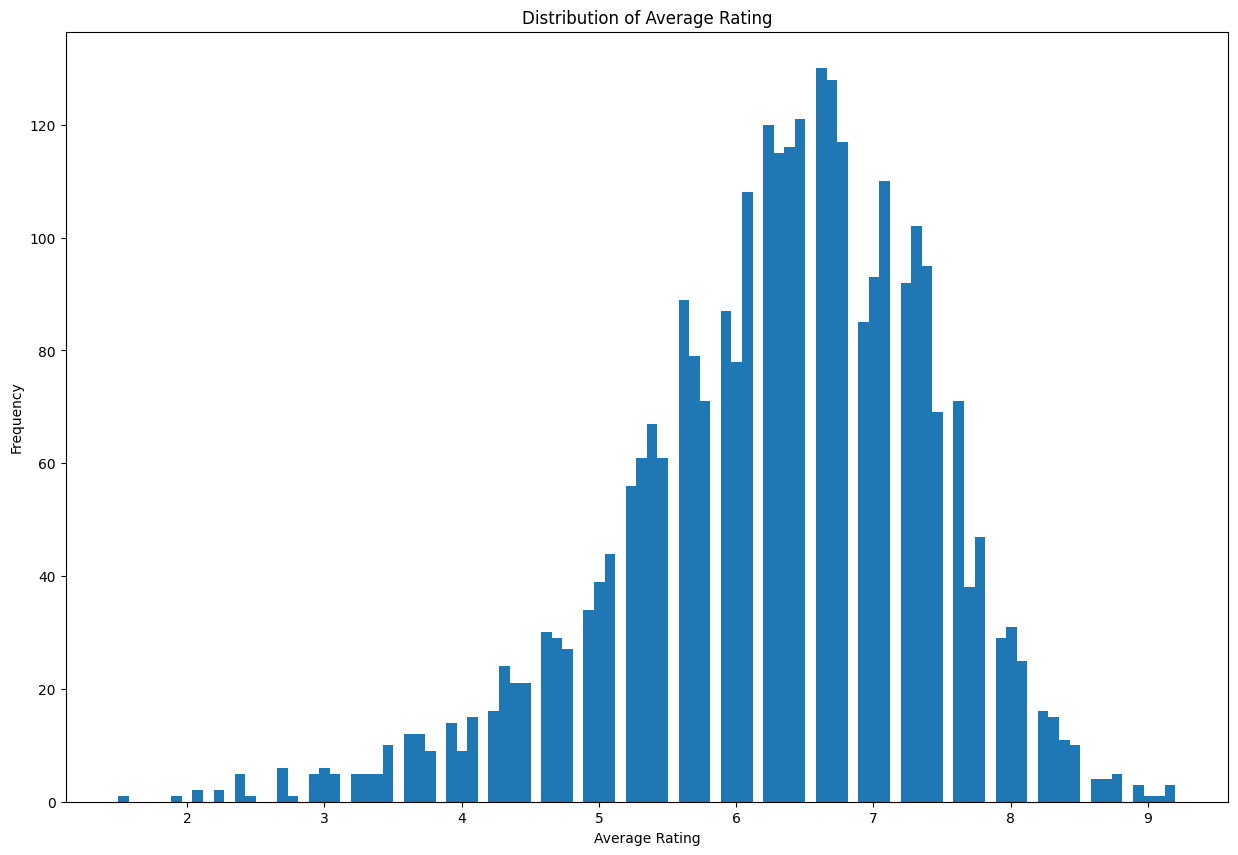

In [805]:
# Visualise the distribution of the average rating
plt.figure(figsize=(15,10))
plt.hist(combined_data['averageRating'], bins=100)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating')
plt.show()

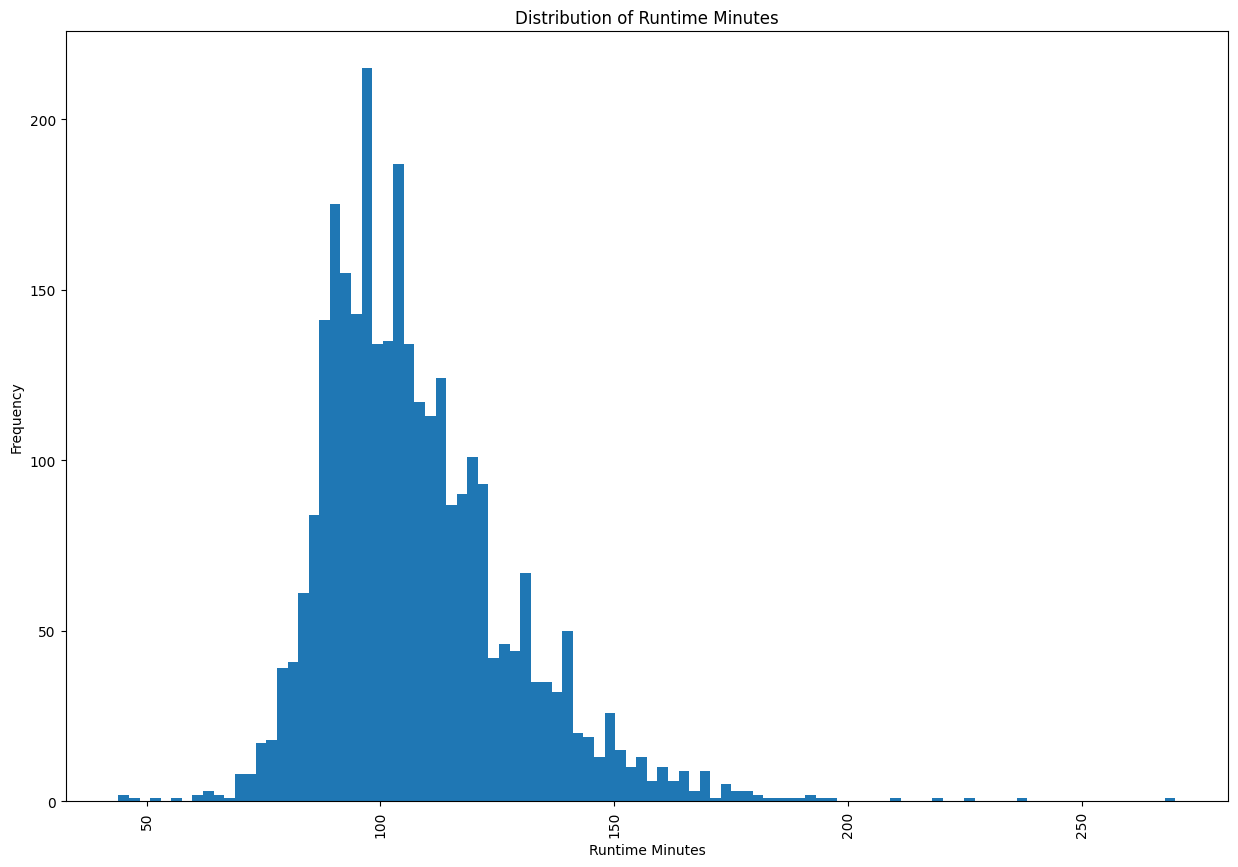

In [806]:
# Histogram of Runtime Minutes
plt.figure(figsize=(15,10))
plt.hist(combined_data['runtimeMinutes'].dropna(), bins=100)
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime Minutes')
plt.xticks(rotation='vertical')
plt.show()

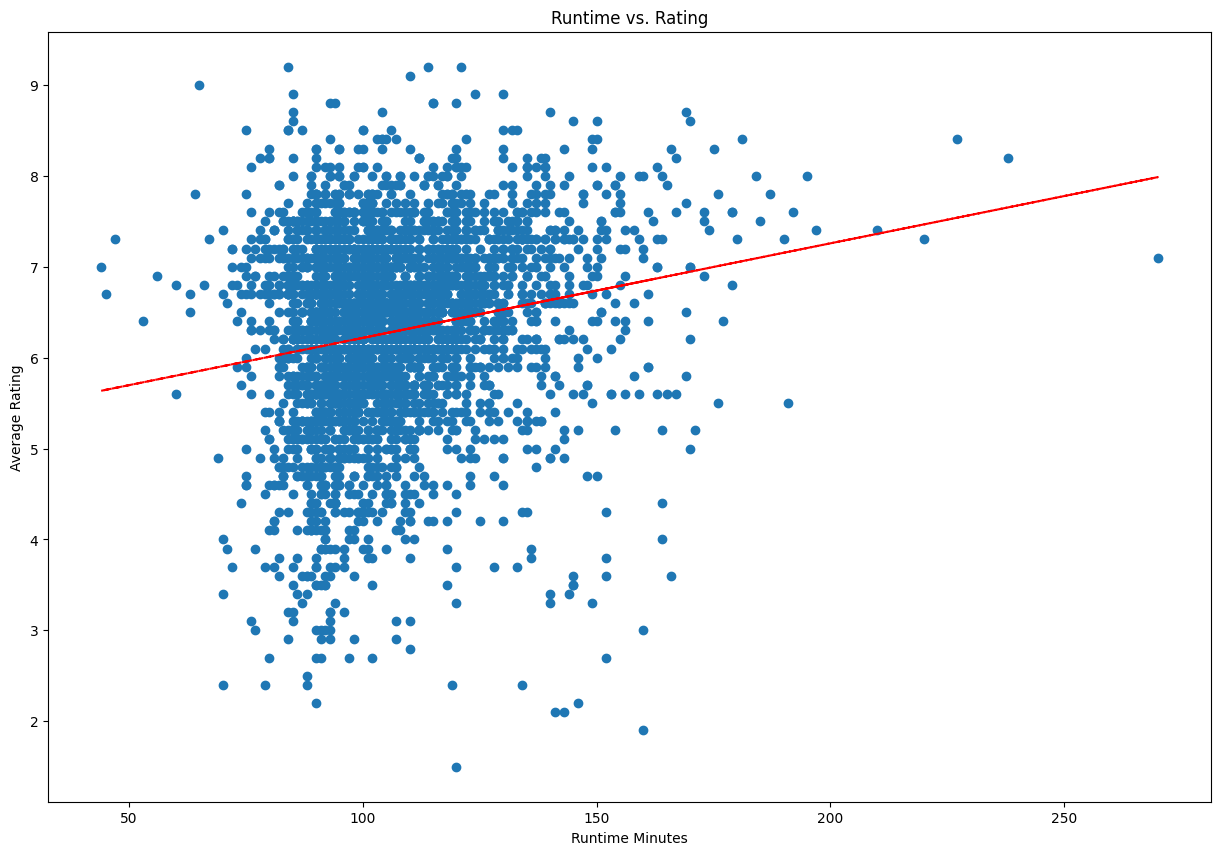

[0.01040091 5.17736088]


In [807]:
# Ensure that the data is in float format
combined_data['runtimeMinutes'] = pd.to_numeric(combined_data['runtimeMinutes'], errors='coerce').astype(float)
combined_data['averageRating'] = pd.to_numeric(combined_data['averageRating'], errors='coerce').astype(float)

# Drop any rows that still have NaNs after the conversion if any
combined_data = combined_data.dropna(subset=['runtimeMinutes', 'averageRating'])

# Your existing code for the scatter plot
plt.figure(figsize=(15,10))
plt.scatter(combined_data['runtimeMinutes'], combined_data['averageRating'])

# Calculate the trend line
z = np.polyfit(combined_data['runtimeMinutes'], combined_data['averageRating'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(combined_data['runtimeMinutes'], p(combined_data['runtimeMinutes']), "r--")

# Labeling the axes
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')

# Title for the plot
plt.title('Runtime vs. Rating')

# Show plot with trend line
plt.show()
print(z)

Text(0.5, 0, 'Genres')

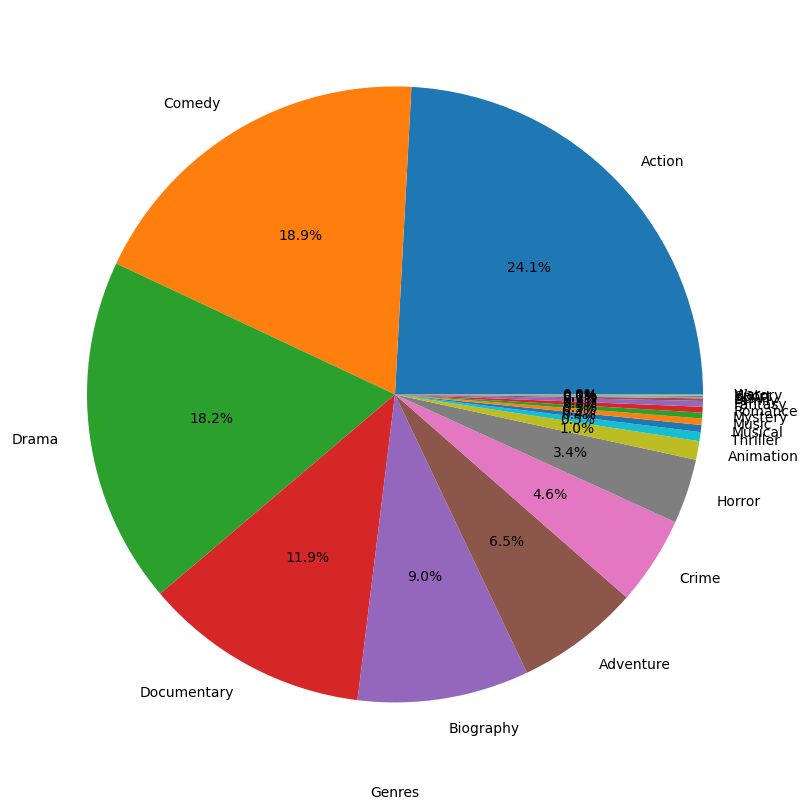

In [808]:
# Calculate the total count of genres
total_count = combined_data[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum().sum()

# Calculate the percentages
genre_percentages = combined_data[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum() / total_count * 100

# Plot the genres as percentages
genre_percentages.sort_values(ascending=False).plot(kind='pie', figsize=(15,10), autopct='%1.1f%%')
plt.xlabel('Genres')

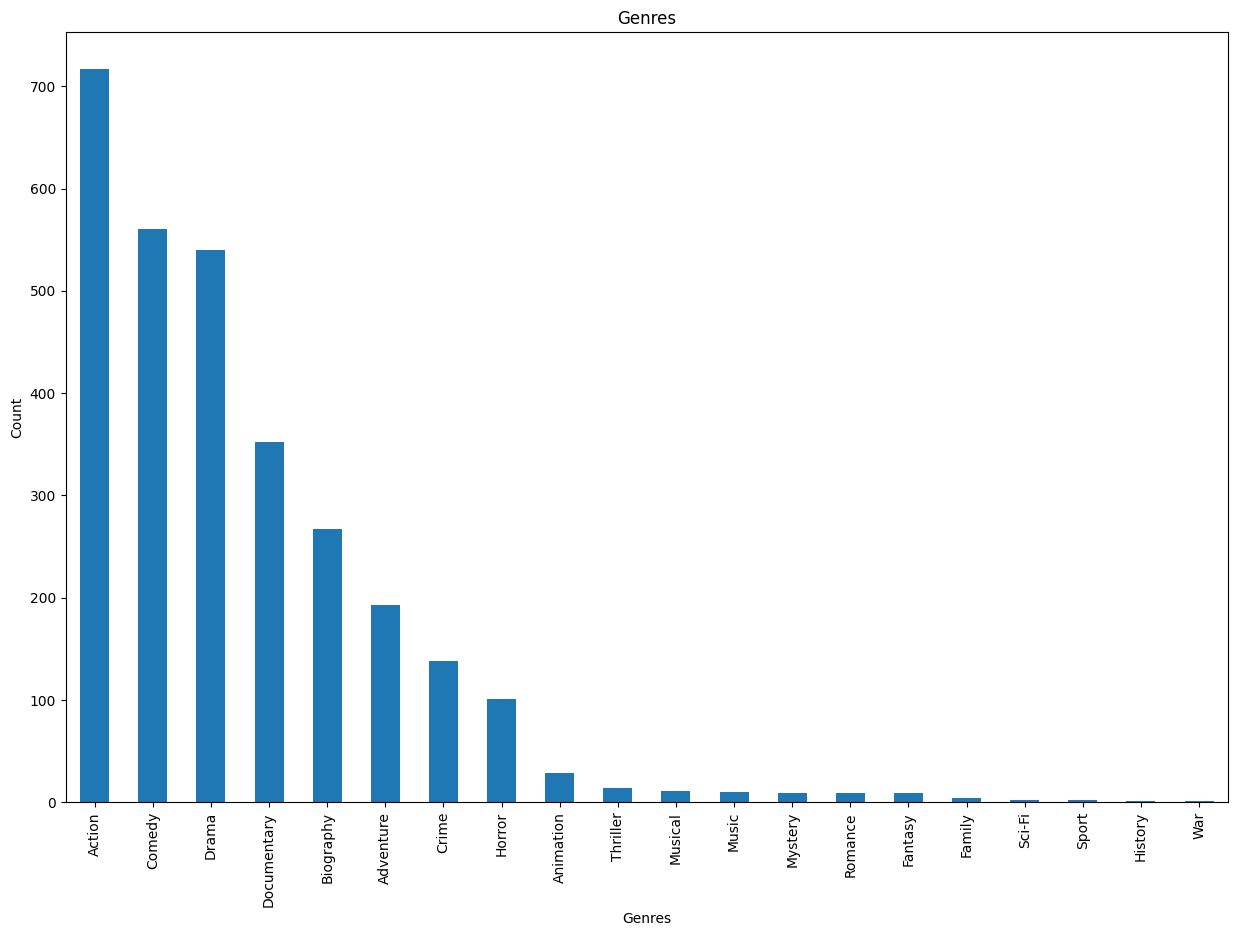

In [809]:
# Plot all the genres of columns in 1 stacked bar chart
combined_data[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genres')
plt.show()

<Figure size 1500x1000 with 0 Axes>

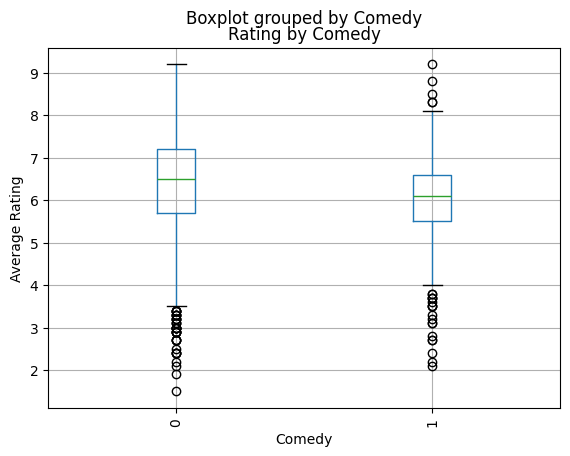

In [810]:
# Box Plot of Ratings by Genres
plt.figure(figsize=(15,10))
combined_data.boxplot(column='averageRating', by='Comedy', rot=90)
plt.xlabel('Comedy')
plt.ylabel('Average Rating')
plt.title('Rating by Comedy')
plt.show()

## Visualising for Before Covid

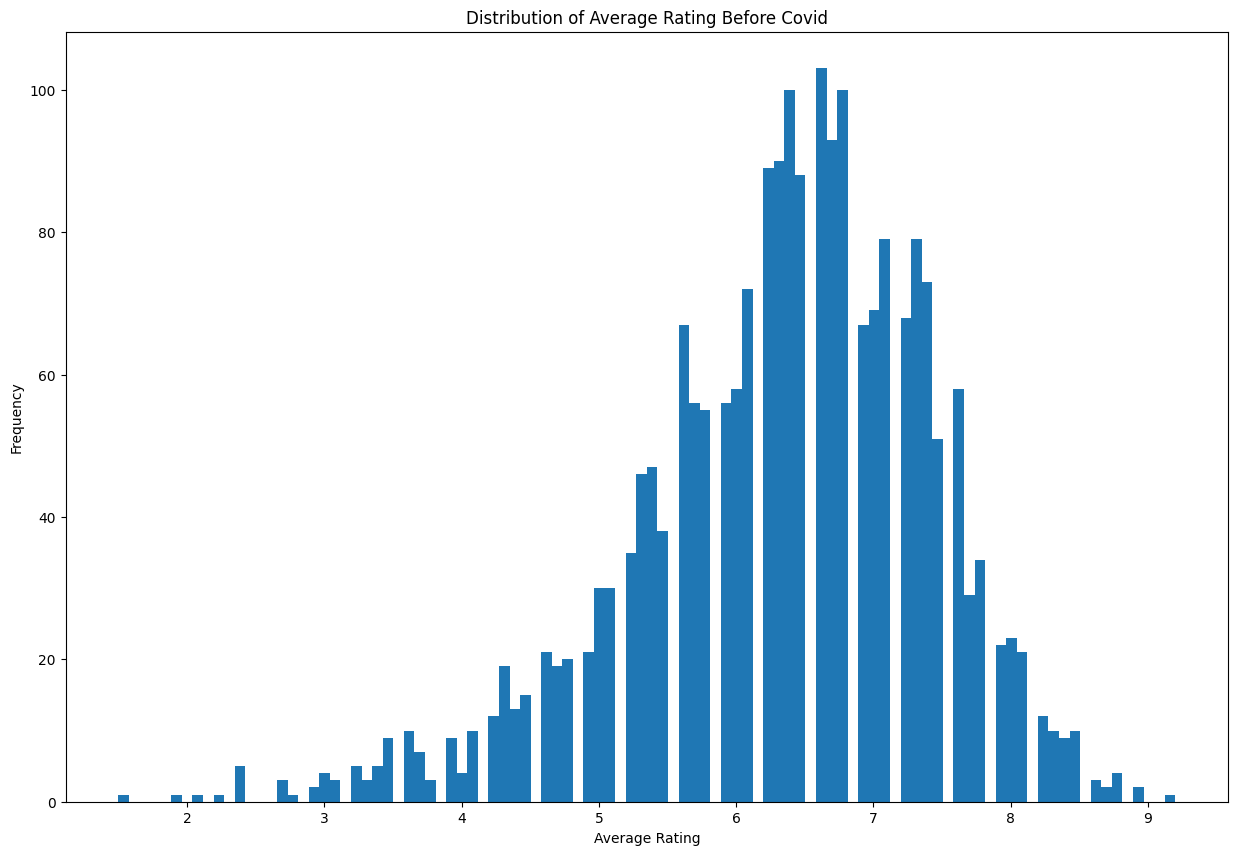

In [811]:
# Visualise the distribution of the average rating
plt.figure(figsize=(15,10))
plt.hist(before_covid_df['averageRating'], bins=100)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating Before Covid')
plt.show()

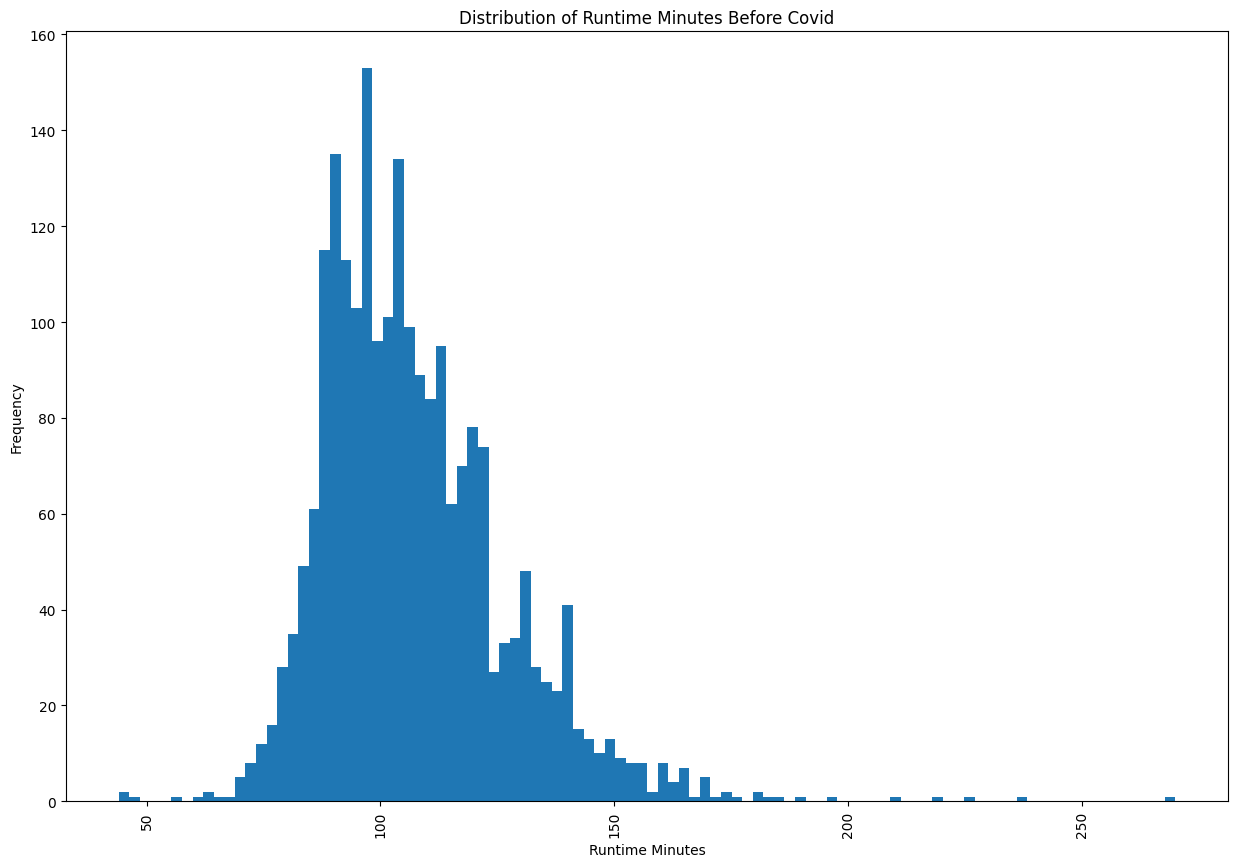

In [812]:
# Histogram of Runtime Minutes
plt.figure(figsize=(15,10))
plt.hist(before_covid_df['runtimeMinutes'].dropna(), bins=100)
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime Minutes Before Covid')
plt.xticks(rotation='vertical')
plt.show()

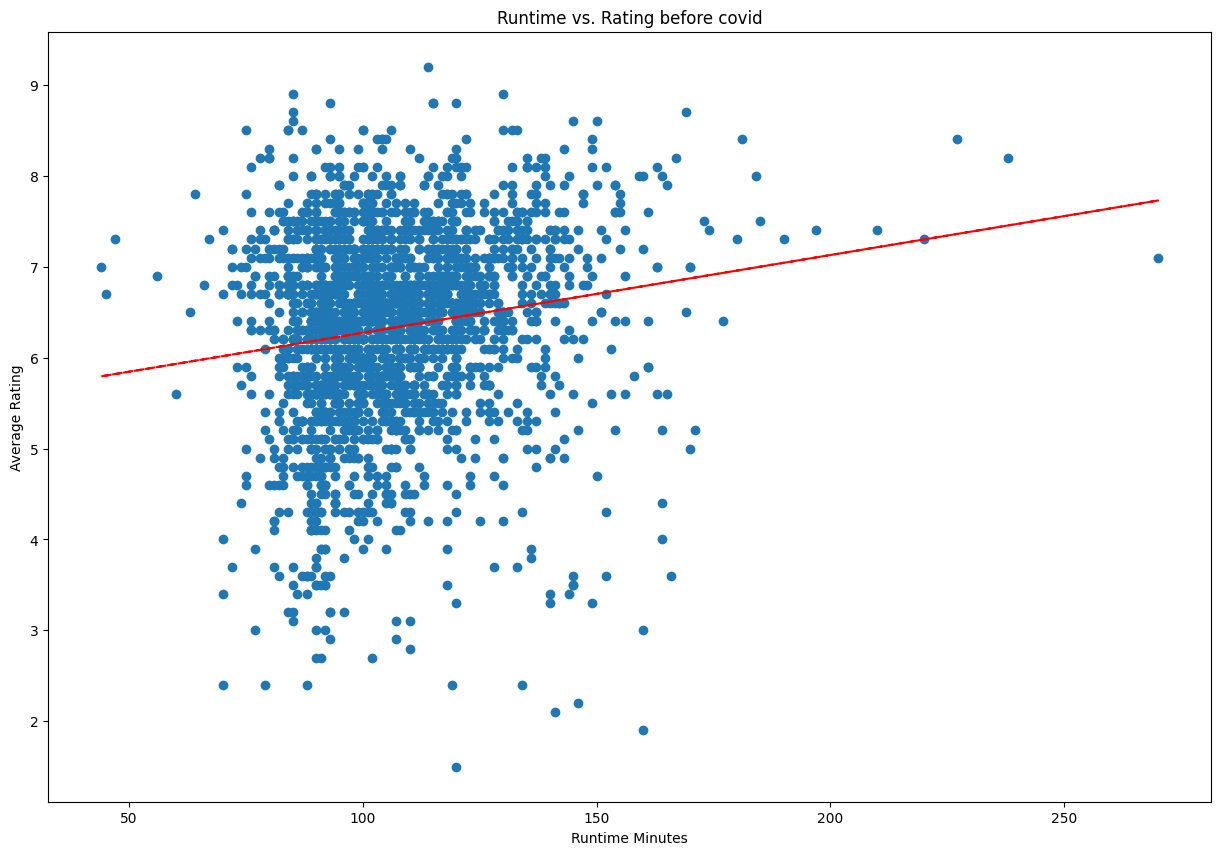

[0.00855797 5.4171871 ]


In [813]:
# Ensure that the data is in float format
before_covid_df['runtimeMinutes'] = pd.to_numeric(before_covid_df['runtimeMinutes'], errors='coerce').astype(float)
before_covid_df['averageRating'] = pd.to_numeric(before_covid_df['averageRating'], errors='coerce').astype(float)

# Drop any rows that still have NaNs after the conversion if any
before_covid_df = before_covid_df.dropna(subset=['runtimeMinutes', 'averageRating'])

# Your existing code for the scatter plot
plt.figure(figsize=(15,10))
plt.scatter(before_covid_df['runtimeMinutes'], before_covid_df['averageRating'])

# Calculate the trend line
z = np.polyfit(before_covid_df['runtimeMinutes'], before_covid_df['averageRating'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(before_covid_df['runtimeMinutes'], p(before_covid_df['runtimeMinutes']), "r--")

# Labeling the axes
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')

# Title for the plot
plt.title('Runtime vs. Rating before covid')

# Show plot with trend line
plt.show()
print(z)

Text(0.5, 0, 'Genres before covid')

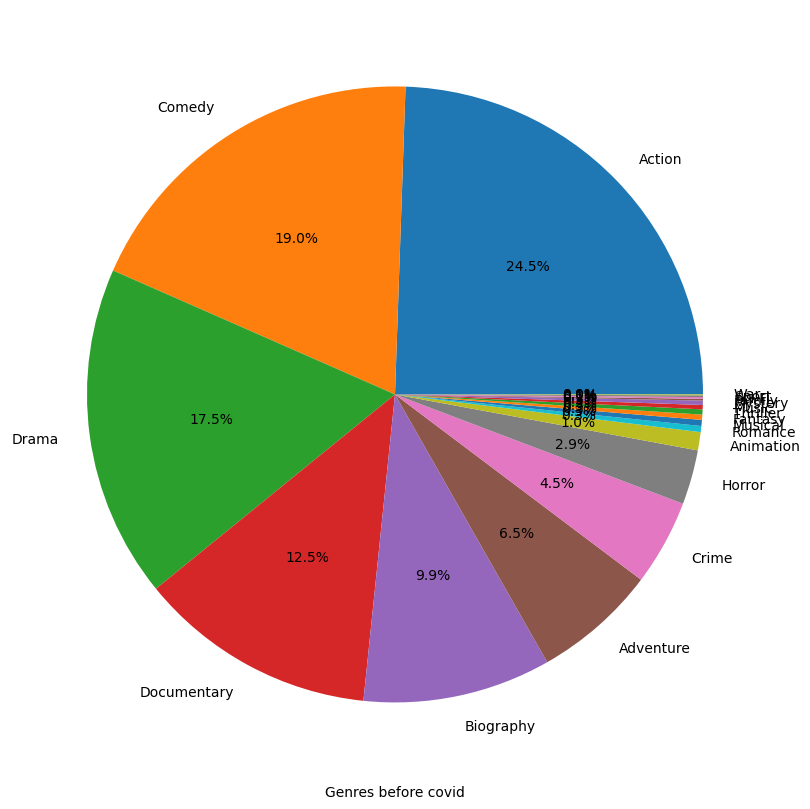

In [814]:
# Calculate the total count of genres
total_count = before_covid_df[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum().sum()

# Calculate the percentages
genre_percentages = before_covid_df[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum() / total_count * 100

# Plot the genres as percentages
genre_percentages.sort_values(ascending=False).plot(kind='pie', figsize=(15,10), autopct='%1.1f%%')
plt.xlabel('Genres before covid')

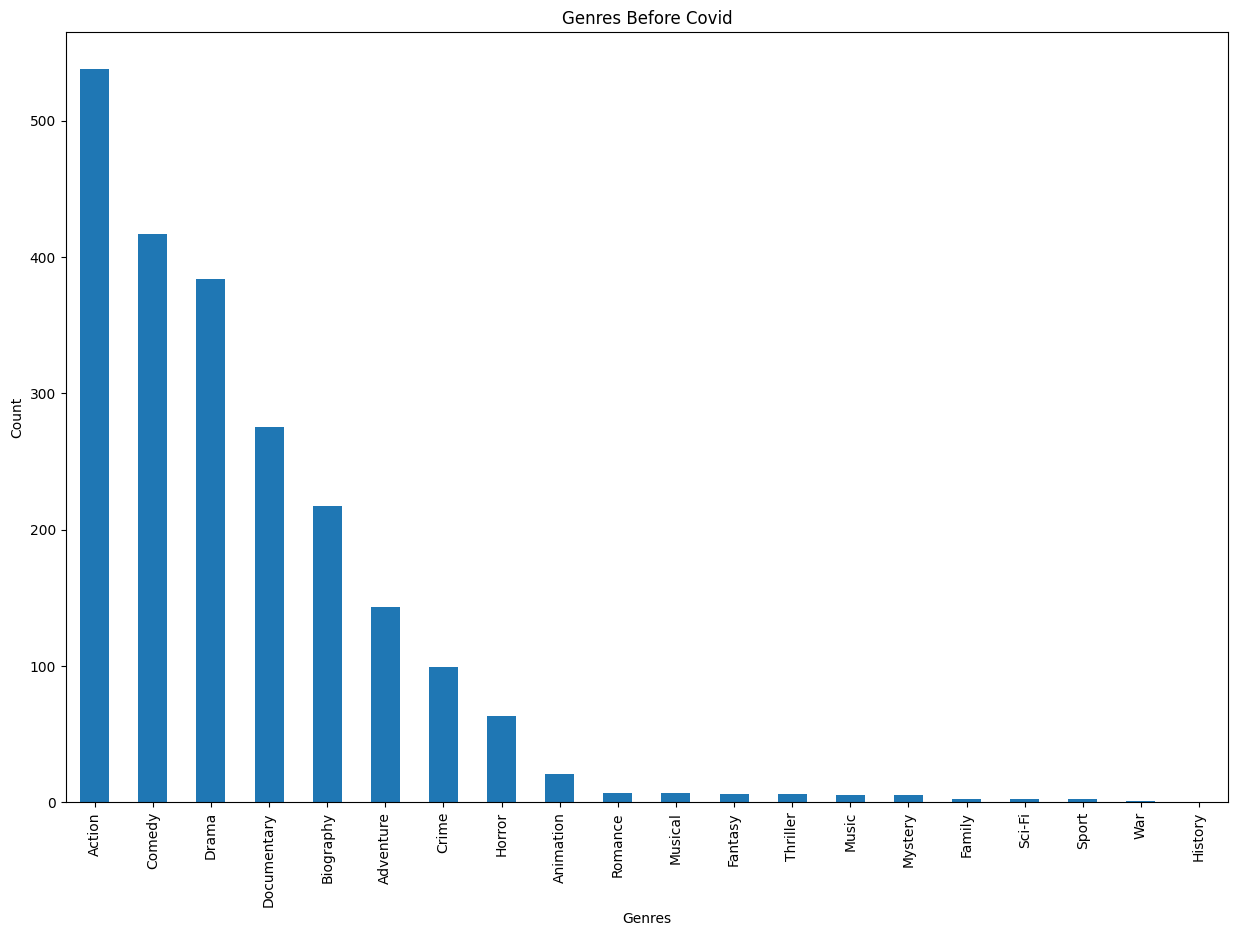

In [815]:
# Plot all the genres of columns in 1 stacked bar chart
before_covid_df[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genres Before Covid')
plt.show()

<Figure size 1500x1000 with 0 Axes>

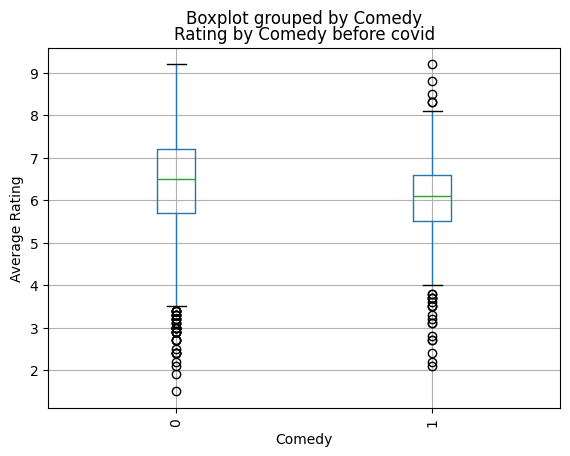

In [816]:
# Box Plot of Ratings by Genres
plt.figure(figsize=(15,10))
combined_data.boxplot(column='averageRating', by='Comedy', rot=90)
plt.xlabel('Comedy')
plt.ylabel('Average Rating')
plt.title('Rating by Comedy before covid')
plt.show()

## Visualising for After Covid

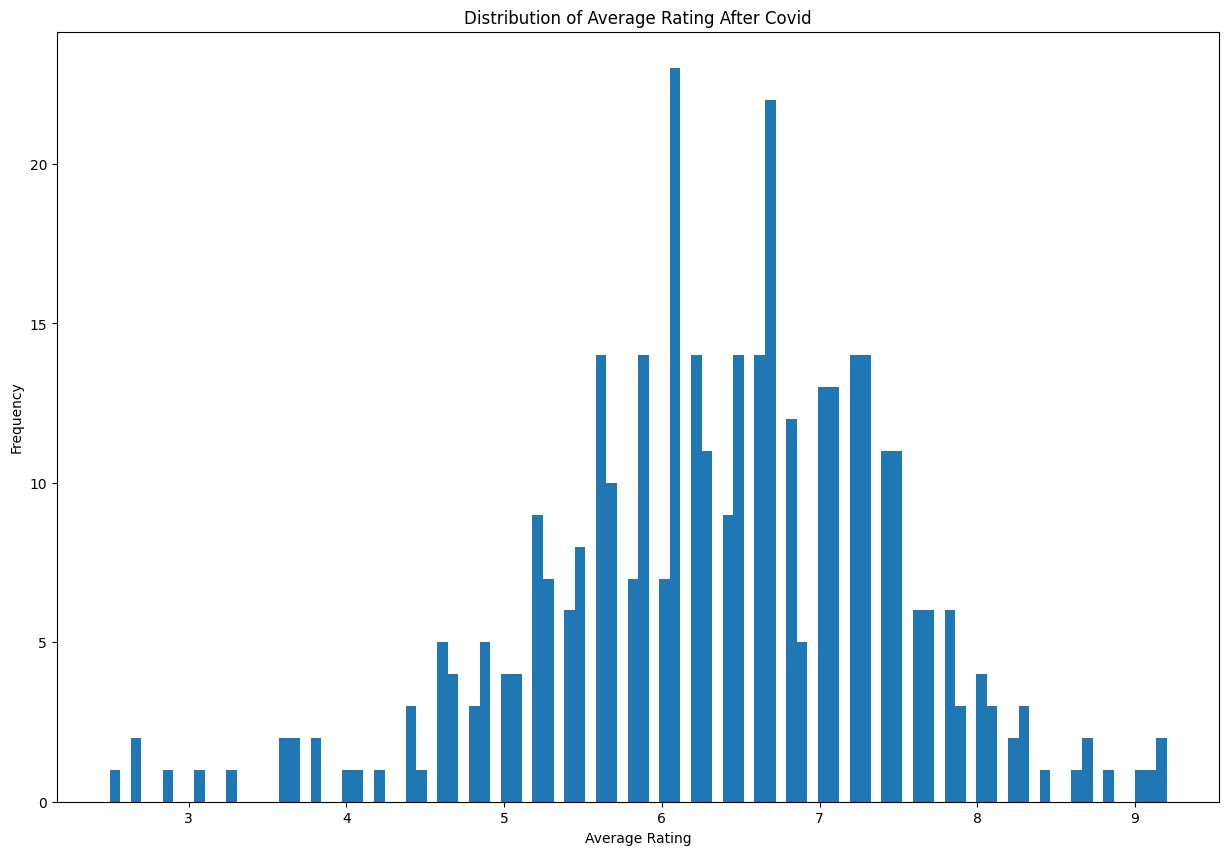

In [817]:
# Visualise the distribution of the average rating
plt.figure(figsize=(15,10))
plt.hist(after_covid_df['averageRating'], bins=100)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating After Covid')
plt.show()

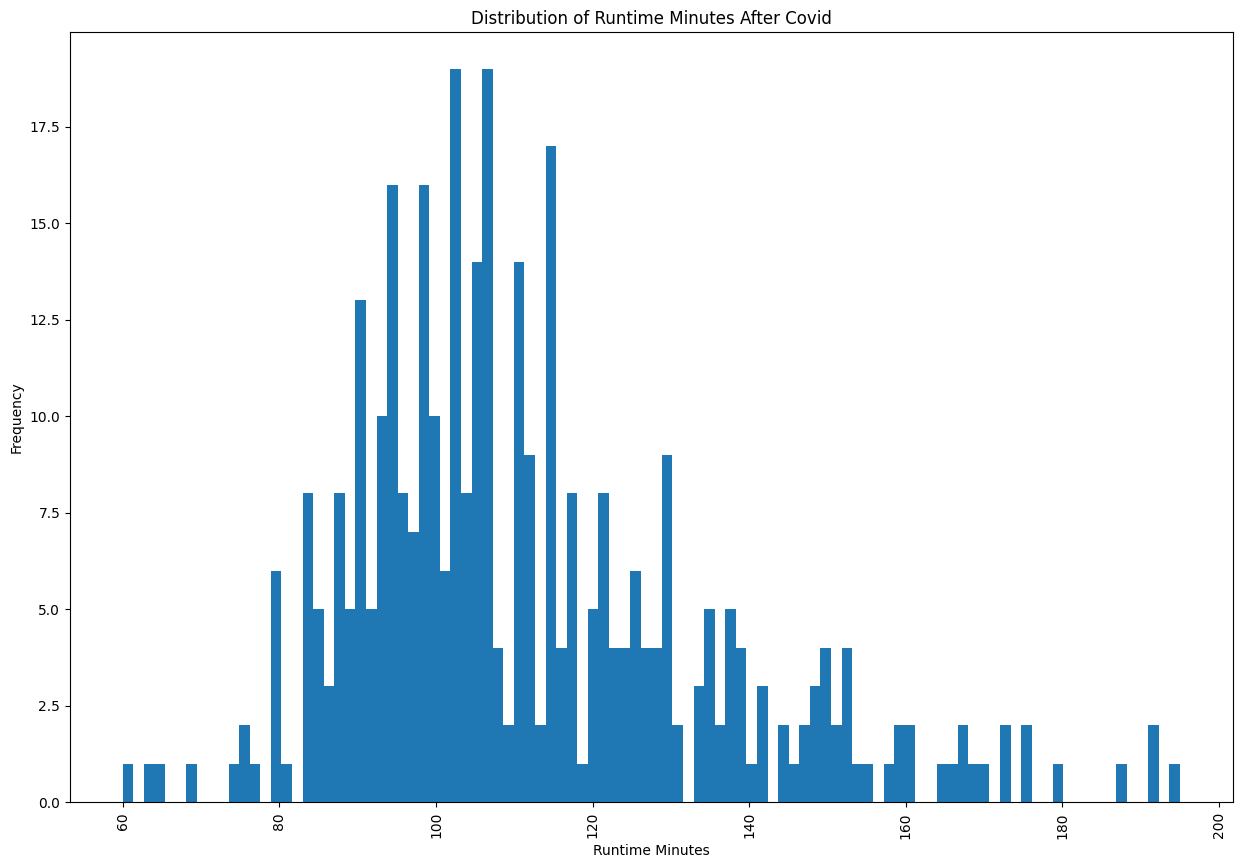

In [818]:
# Histogram of Runtime Minutes
plt.figure(figsize=(15,10))
plt.hist(after_covid_df['runtimeMinutes'].dropna(), bins=100)
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime Minutes After Covid')
plt.xticks(rotation='vertical')
plt.show()

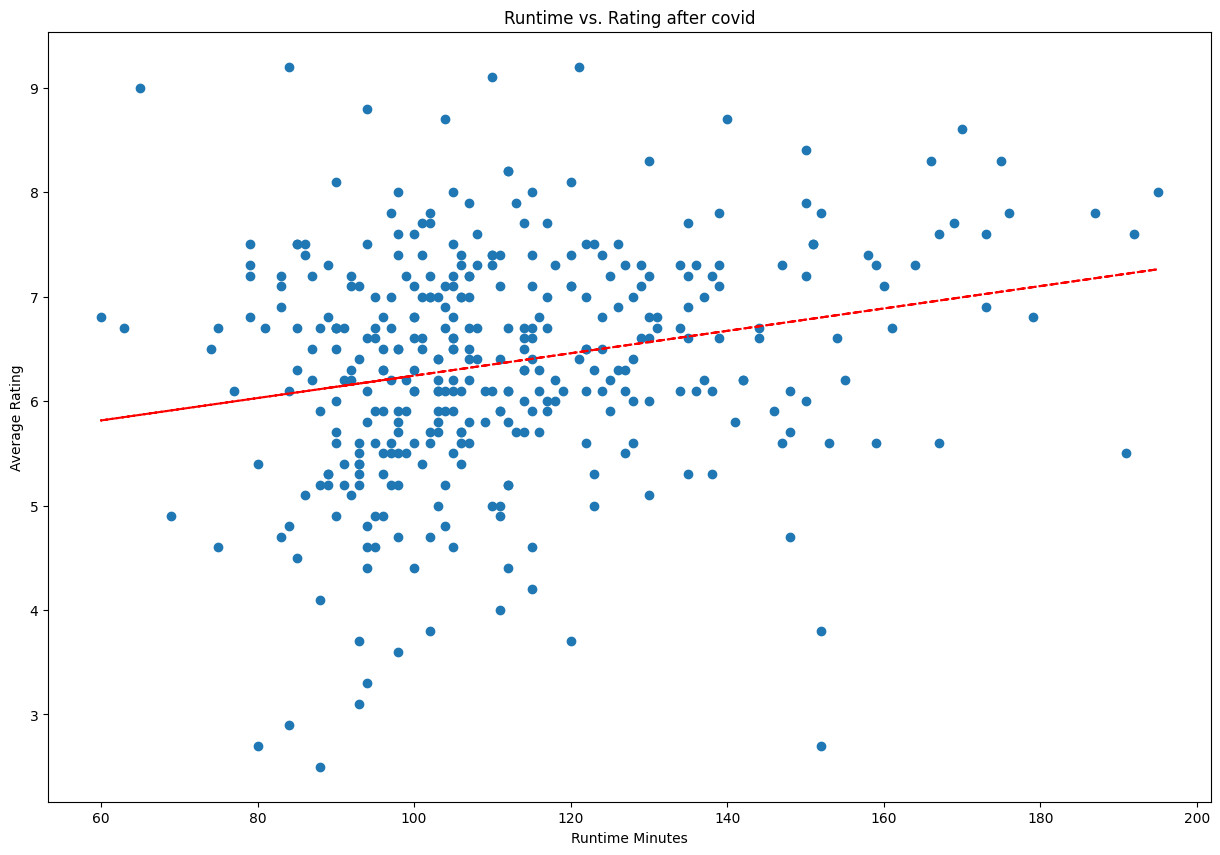

[0.01071725 5.17146903]


In [819]:
# Ensure that the data is in float format
after_covid_df['runtimeMinutes'] = pd.to_numeric(after_covid_df['runtimeMinutes'], errors='coerce').astype(float)
after_covid_df['averageRating'] = pd.to_numeric(after_covid_df['averageRating'], errors='coerce').astype(float)

# Drop any rows that still have NaNs after the conversion if any
after_covid_df = after_covid_df.dropna(subset=['runtimeMinutes', 'averageRating'])

# Your existing code for the scatter plot
plt.figure(figsize=(15,10))
plt.scatter(after_covid_df['runtimeMinutes'], after_covid_df['averageRating'])

# Calculate the trend line
z = np.polyfit(after_covid_df['runtimeMinutes'], after_covid_df['averageRating'], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(after_covid_df['runtimeMinutes'], p(after_covid_df['runtimeMinutes']), "r--")

# Labeling the axes
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')

# Title for the plot
plt.title('Runtime vs. Rating after covid')

# Show plot with trend line
plt.show()
print(z)

Text(0.5, 0, 'Genres after covid')

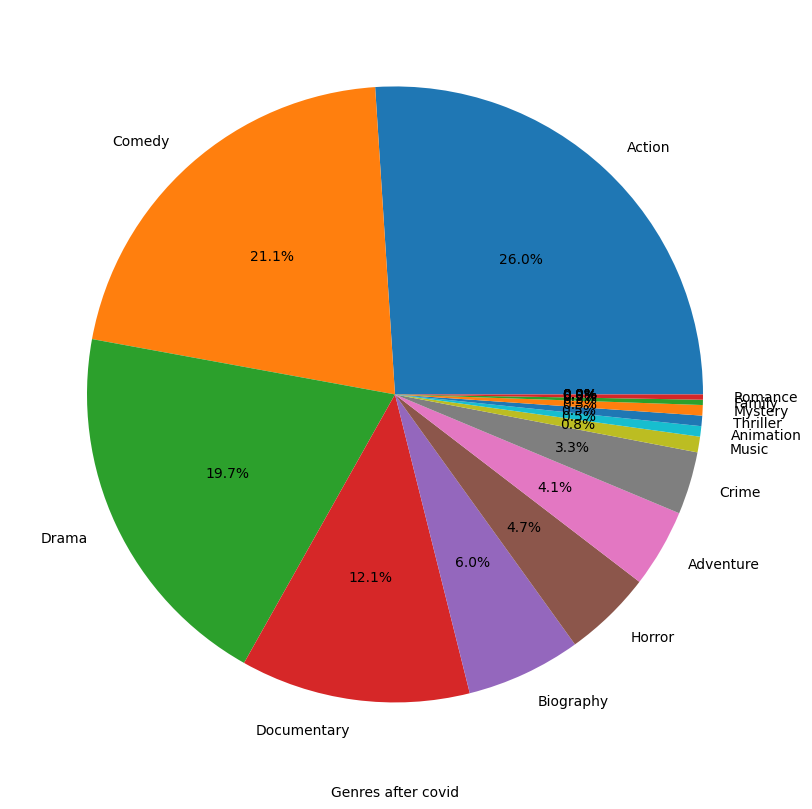

In [820]:
# Calculate the total count of genres
total_count = after_covid_df[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum().sum()

# Calculate the percentages
genre_percentages = after_covid_df[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum() / total_count * 100

# Plot the genres as percentages
genre_percentages.sort_values(ascending=False).plot(kind='pie', figsize=(15,10), autopct='%1.1f%%')
plt.xlabel('Genres after covid')

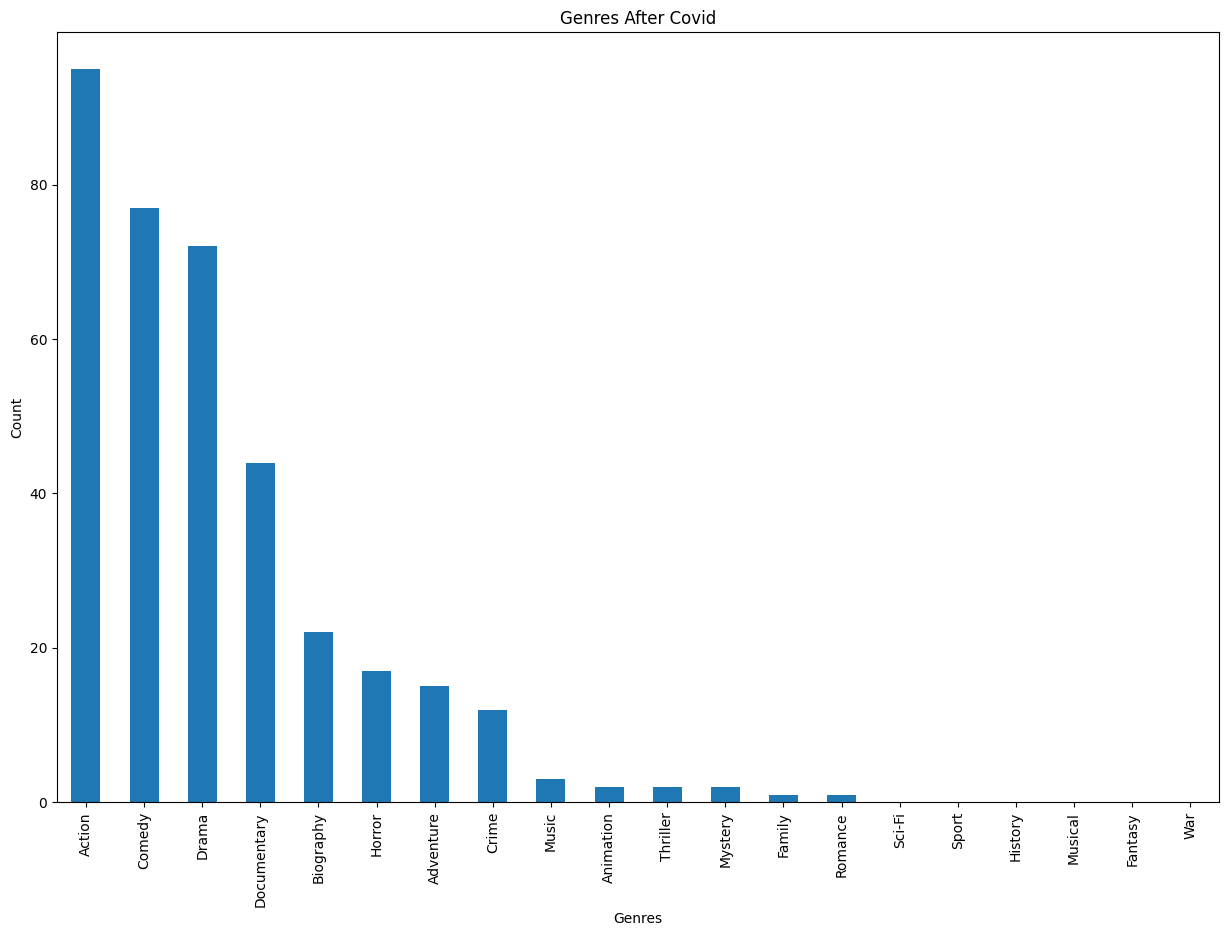

In [821]:
# Plot all the genres of columns in 1 stacked bar chart
after_covid_df[['Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War']].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,10))
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genres After Covid')
plt.show()

<Figure size 1500x1000 with 0 Axes>

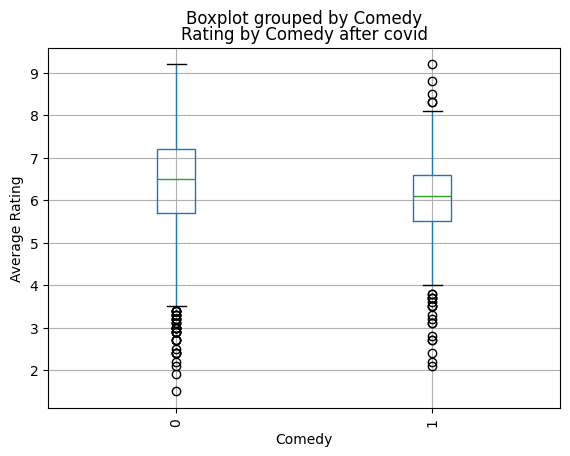

In [822]:
# Box Plot of Ratings by Genres
plt.figure(figsize=(15,10))
combined_data.boxplot(column='averageRating', by='Comedy', rot=90)
plt.xlabel('Comedy')
plt.ylabel('Average Rating')
plt.title('Rating by Comedy after covid')
plt.show()

# <font color='orange'>Hypothesis Formulation</font>

I believe that before covid the number of Comedy movies were way more but after covid it went down and there were more Drama movies being made.

## Here are my rationals:
**Changing Tastes**: People's moods and tastes changed because of the pandemic. They might have liked drama movies more, which are often serious and thought-provoking, as a way to process their feelings.

**Filming Challenges**: Making comedies, which usually need bigger groups and lively scenes, was harder with COVID-19 restrictions. Drama movies can be made with fewer people and simpler settings, so they were easier to film during this time.

**Money Decisions**: When theaters closed and more people watched movies at home, movie makers thought dramas were a safer bet. They often cost less and work well on small screens.

**Reflecting Reality**: Drama movies might have been more popular because they show real-life issues and emotions, which people could relate to during the pandemic.

# <font color='orange'>Data Analysis

### Before Covid analysis

In [823]:
# Preparing the dataset for regression
before_covid_df['Total Gross'] = pd.to_numeric(before_covid_df['Total Gross'], errors='coerce')  # Ensuring 'Total Gross' is numeric
before_covid_df['runtimeMinutes'] = pd.to_numeric(before_covid_df['runtimeMinutes'], errors='coerce')  # Ensuring 'runtimeMinutes' is numeric
before_covid_df['averageRating'] = pd.to_numeric(before_covid_df['averageRating'], errors='coerce')  # Ensuring 'averageRating' is numeric
before_covid_df['Start Year'] = pd.to_numeric(before_covid_df['Start Year'], errors='coerce')  # Ensuring 'Start Year' is numeric

# List of genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                 'Sport', 'Thriller', 'War']

# Filtering necessary columns
regression_df = before_covid_df[['Total Gross'] + genre_columns + ['Start Year', 'runtimeMinutes', 'averageRating', 'isAdult']]

# Convert object columns to numeric
regression_df['Comedy'] = pd.to_numeric(regression_df['Comedy'], errors='coerce')
regression_df['Drama'] = pd.to_numeric(regression_df['Drama'], errors='coerce')
regression_df['isAdult'] = pd.to_numeric(regression_df['isAdult'], errors='coerce')

# Instead of directly modifying regression_df, use .loc to ensure changes are made correctly
for genre in genre_columns + ['isAdult']:
    regression_df.loc[:, genre] = pd.to_numeric(regression_df[genre], errors='coerce')

# Drop rows with missing values for simplicity
regression_df.dropna(inplace=True)

# Defining the dependent and independent variables
X = regression_df[genre_columns + ['Start Year', 'runtimeMinutes', 'averageRating', 'isAdult']]
y = regression_df['Total Gross']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Running the regression model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
model_summary_before_covid = model.summary()
model_summary_before_covid

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/3356359587.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Comedy'] = pd.to_numeric(regression_df['Comedy'], errors='coerce')
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/3356359587.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Drama'] = pd.to_numeric(regression_df['Drama'], errors='coerce')
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/3356359587.py:18: SettingWithC

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Gross   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     21.14
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           6.00e-76
Time:                        21:51:10   Log-Likelihood:                -42579.
No. Observations:                2201   AIC:                         8.520e+04
Df Residuals:                    2178   BIC:                         8.534e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.022e+08   1.58e+09      0.319      0.750   -2.59e+09    3.59e+09
Action          8.576e+07   6.15e+07      1.395      0.163   -3.48e+07    2.06e+08
Adventure       1.147e+08   6.16e+07      1.861      0.063   -6.16e+06    2.36e+08
Animation       4.891e+07   6.29e+07      0.778      0.437   -7.44e+07    1.72e+08
Biography       3.708e+07   6.15e+07      0.603      0.547   -8.36e+07    1.58e+08
Comedy           5.46e+07   6.15e+07      0.888      0.375    -6.6e+07    1.75e+08
Crime           4.815e+07   6.17e+07      0.780      0.435   -7.29e+07    1.69e+08
Documentary     2.998e+07   6.15e+07      0.487      0.626   -9.06e+07    1.51e+08
Drama           4.546e+07   6.15e+07      0.739      0.460   -7.51e+07    1.66e+08
Family          4.996e+07   7.52e+07      0.664      0.507   -9.76e+07    1.97e+08
Fantasy         4.063e+07   6.63e+07      0.612      0.540   -8.95e+07    1.71e+08
History        -6.462e-07   1.91e-06     -0.338      0.736    -4.4e-06    3.11e-06
Horror          8.633e+07    6.2e+07      1.392      0.164   -3.53e+07    2.08e+08
Music           1.285e+07   6.72e+07      0.191      0.848   -1.19e+08    1.45e+08
Musical         9.938e+06   6.56e+07      0.152      0.880   -1.19e+08    1.39e+08
Mystery         4.155e+07   6.73e+07      0.617      0.537   -9.04e+07    1.74e+08
Romance         5.981e+07   6.58e+07      0.909      0.363   -6.92e+07    1.89e+08
Sci-Fi          8.012e+07   7.54e+07      1.062      0.288   -6.78e+07    2.28e+08
Sport           4.363e+06   7.53e+07      0.058      0.954   -1.43e+08    1.52e+08
Thriller        6.502e+07   6.64e+07      0.979      0.328   -6.53e+07    1.95e+08
War             2.342e+07   8.68e+07      0.270      0.787   -1.47e+08    1.94e+08
Start Year     -3.284e+05    7.8e+05     -0.421      0.674   -1.86e+06     1.2e+06
runtimeMinutes  3.911e+05   7.22e+04      5.416      0.000    2.49e+05    5.33e+05
averageRating   1.312e+07   1.35e+06      9.706      0.000    1.05e+07    1.58e+07
isAdult                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2172.148   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125862.021
Skew:                           4.709   Prob(JB):                         0.00
Kurtosis:                      38.829   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### After Covid analysis

In [824]:
# Preparing the dataset for regression
after_covid_df['Total Gross'] = pd.to_numeric(after_covid_df['Total Gross'], errors='coerce')  # Ensuring 'Total Gross' is numeric
after_covid_df['runtimeMinutes'] = pd.to_numeric(after_covid_df['runtimeMinutes'], errors='coerce')  # Ensuring 'runtimeMinutes' is numeric
after_covid_df['averageRating'] = pd.to_numeric(after_covid_df['averageRating'], errors='coerce')  # Ensuring 'averageRating' is numeric
after_covid_df['Start Year'] = pd.to_numeric(after_covid_df['Start Year'], errors='coerce')  # Ensuring 'Start Year' is numeric

# List of genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
                 'Sport', 'Thriller', 'War']

# Filtering necessary columns
regression_df = after_covid_df[['Total Gross'] + genre_columns + ['Start Year', 'runtimeMinutes', 'averageRating', 'isAdult']]

# Convert object columns to numeric
regression_df['Comedy'] = pd.to_numeric(regression_df['Comedy'], errors='coerce')
regression_df['Drama'] = pd.to_numeric(regression_df['Drama'], errors='coerce')
regression_df['isAdult'] = pd.to_numeric(regression_df['isAdult'], errors='coerce')

# Instead of directly modifying regression_df, use .loc to ensure changes are made correctly
for genre in genre_columns + ['isAdult']:
    regression_df.loc[:, genre] = pd.to_numeric(regression_df[genre], errors='coerce')

# Drop rows with missing values for simplicity
regression_df.dropna(inplace=True)

# Defining the dependent and independent variables
X = regression_df[genre_columns + ['Start Year', 'runtimeMinutes', 'averageRating', 'isAdult']]
y = regression_df['Total Gross']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Running the regression model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
model_summary_after_covid = model.summary()
model_summary_after_covid

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/4205116198.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Comedy'] = pd.to_numeric(regression_df['Comedy'], errors='coerce')
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/4205116198.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_df['Drama'] = pd.to_numeric(regression_df['Drama'], errors='coerce')
/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/4205116198.py:18: SettingWithC

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Gross   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     5.718
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.13e-11
Time:                        21:51:10   Log-Likelihood:                -7151.6
No. Observations:                 365   AIC:                         1.434e+04
Df Residuals:                     348   BIC:                         1.440e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.985e+09   1.79e+10     -0.503      0.615   -4.41e+10    2.61e+10
Action         -5.977e+08   1.28e+09     -0.468      0.640   -3.11e+09    1.91e+09
Adventure      -5.443e+08   1.28e+09     -0.426      0.670   -3.06e+09    1.97e+09
Animation      -6.641e+08   1.28e+09     -0.519      0.604   -3.18e+09    1.85e+09
Biography      -6.602e+08   1.28e+09     -0.517      0.605   -3.17e+09    1.85e+09
Comedy          -6.49e+08   1.28e+09     -0.508      0.611   -3.16e+09    1.86e+09
Crime          -6.609e+08   1.28e+09     -0.518      0.605   -3.17e+09    1.85e+09
Documentary    -6.623e+08   1.27e+09     -0.519      0.604   -3.17e+09    1.85e+09
Drama          -6.532e+08   1.28e+09     -0.512      0.609   -3.16e+09    1.86e+09
Family         -6.334e+08   1.28e+09     -0.496      0.620   -3.14e+09    1.88e+09
Fantasy        -1.403e-05   2.79e-05     -0.503      0.615   -6.89e-05    4.08e-05
History        -2.971e-05   5.91e-05     -0.503      0.615      -0.000    8.65e-05
Horror          -6.11e+08   1.28e+09     -0.478      0.633   -3.13e+09     1.9e+09
Music          -6.878e+08   1.28e+09     -0.537      0.592   -3.21e+09    1.83e+09
Musical         -8.22e-10    8.8e-09     -0.093      0.926   -1.81e-08    1.65e-08
Mystery         -6.35e+08   1.27e+09     -0.498      0.619   -3.14e+09    1.87e+09
Romance        -6.507e+08   1.28e+09     -0.510      0.610   -3.16e+09    1.86e+09
Sci-Fi                  0          0        nan        nan           0           0
Sport                   0          0        nan        nan           0           0
Thriller       -6.758e+08   1.27e+09     -0.530      0.596   -3.18e+09    1.83e+09
War                     0          0        nan        nan           0           0
Start Year      4.698e+06   9.46e+06      0.496      0.620   -1.39e+07    2.33e+07
runtimeMinutes  5.284e+05   2.12e+05      2.497      0.013    1.12e+05    9.45e+05
averageRating   1.392e+07    4.3e+06      3.239      0.001    5.47e+06    2.24e+07
isAdult                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      337.658   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8790.578
Skew:                           3.918   Prob(JB):                         0.00
Kurtosis:                      25.729   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Analyze the Impact of Other Variables on Demand:

### Before covid

In [825]:
# For each genre, analyze the impact of other variables on the demand
genre_impacts = {}
for genre in genre_columns:
    impact = {}
    impact['Rating Impact'] = model.params['averageRating'] * before_covid_df['averageRating'].mean()
    impact['Runtime Impact'] = model.params['runtimeMinutes'] * before_covid_df['runtimeMinutes'].mean()
    genre_impacts[genre] = impact

# Output the impact values
genre_impacts

{'Action': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Adventure': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Animation': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Biography': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Comedy': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Crime': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Documentary': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Drama': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Family': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Fantasy': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'History': {'Rating Impact': 88163948.15370339,
  'Runtime Impact': 56622761.92018056},
 'Horror': {'Ratin

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/2969168463.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  before_covid_df['Release Date'] = pd.to_datetime(before_covid_df['Release Date'])


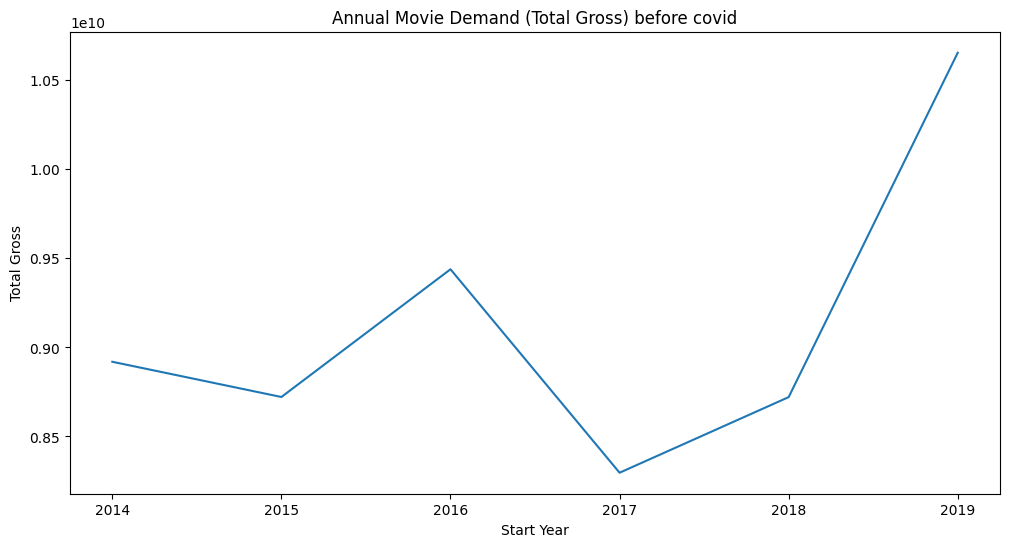

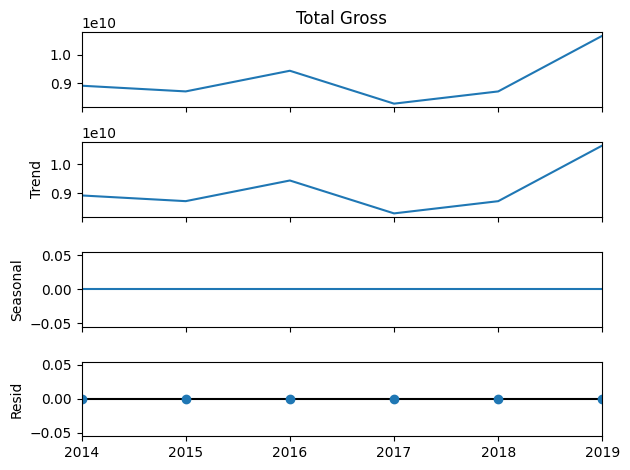

In [826]:
# Ensure that 'Release Date' is a datetime column and 'Total Gross' is numeric
before_covid_df['Release Date'] = pd.to_datetime(before_covid_df['Release Date'])
before_covid_df['Total Gross'] = pd.to_numeric(before_covid_df['Total Gross'], errors='coerce')

# Sort the DataFrame by 'Release Date'
before_covid_df.sort_values('Release Date', inplace=True)

# Group by 'Start Year' and sum 'Total Gross' to get annual demand
annual_demand = before_covid_df.groupby('Start Year')['Total Gross'].sum()

# Plot the time series of annual demand
plt.figure(figsize=(12, 6))
annual_demand.plot(title='Annual Movie Demand (Total Gross) before covid')
plt.ylabel('Total Gross')
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(annual_demand, model='additive', period=1)  # Adjust the period based on your data's seasonality

# Plot the decomposed time series components
decomposition.plot()
plt.show()

### After Covid

In [827]:
# For each genre, analyze the impact of other variables on the demand
genre_impacts = {}
for genre in genre_columns:
    impact = {}
    impact['Rating Impact'] = model.params['averageRating'] * after_covid_df['averageRating'].mean()
    impact['Runtime Impact'] = model.params['runtimeMinutes'] * after_covid_df['runtimeMinutes'].mean()
    genre_impacts[genre] = impact

# Output the impact values
genre_impacts

{'Action': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Adventure': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Animation': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Biography': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Comedy': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Crime': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Documentary': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Drama': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Family': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Fantasy': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'History': {'Rating Impact': 88671607.55916776,
  'Runtime Impact': 59128229.11486063},
 'Horror': {'Ratin

/var/folders/7_/z9jxc0jj6fx4snlcjg1wby4r0000gn/T/ipykernel_8325/3885326522.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  after_covid_df['Release Date'] = pd.to_datetime(after_covid_df['Release Date'])


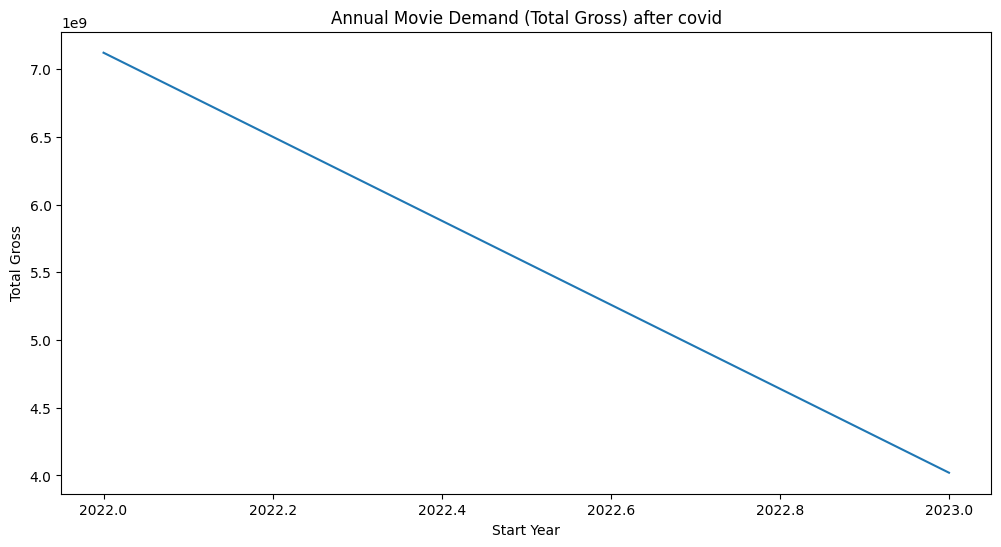

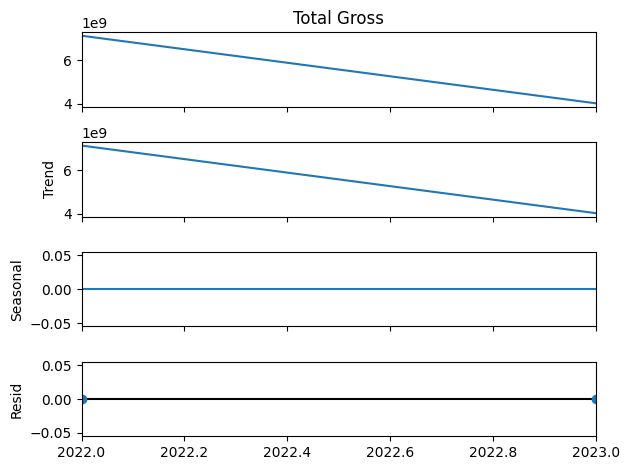

In [828]:
# Ensure that 'Release Date' is a datetime column and 'Total Gross' is numeric
after_covid_df['Release Date'] = pd.to_datetime(after_covid_df['Release Date'])
after_covid_df['Total Gross'] = pd.to_numeric(after_covid_df['Total Gross'], errors='coerce')

# Sort the DataFrame by 'Release Date'
after_covid_df.sort_values('Release Date', inplace=True)

# Group by 'Start Year' and sum 'Total Gross' to get annual demand
annual_demand = after_covid_df.groupby('Start Year')['Total Gross'].sum()

# Plot the time series of annual demand
plt.figure(figsize=(12, 6))
annual_demand.plot(title='Annual Movie Demand (Total Gross) after covid')
plt.ylabel('Total Gross')
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(annual_demand, model='additive', period=1)  # Adjust the period based on your data's seasonality

# Plot the decomposed time series components
decomposition.plot()
plt.show()

---------

## <font color='orange'>Interpretation:</font>

The regression analyses conducted for the periods before and after COVID-19 reveal several insights into movie genre performance. For the period before COVID-19, the R-squared value of 0.176 indicates that approximately 17.6% of the variability in total gross revenue can be explained by the model. While this suggests a degree of association between the variables and total gross revenue, a significant portion of the variability remains unexplained, which could be due to factors not included in the model.

Several genres appear to have a positive, yet not statistically significant, association with total gross revenue. Notably, genres such as Action, Adventure, and Horror show positive coefficients, implying that movies in these genres tend to have higher gross revenues. However, the lack of statistical significance, as indicated by p-values greater than the common alpha level of 0.05, means we cannot confidently assert these genres consistently performed better in terms of revenue generation.

The positive coefficient of the runtimeMinutes variable suggests that longer movies are associated with higher total gross revenues, which is statistically significant as indicated by the low p-value. This could reflect a preference for more comprehensive storytelling or higher-budget productions that command more audience attention.

The post-COVID-19 regression shows a similar pattern with an R-squared value of 0.208, indicating that 20.8% of the variance in total gross revenue is explained by the model. Again, we see a lack of statistical significance for the genre coefficients, which could imply a shift in the movie-going audience's preferences or a change in production and distribution strategies influenced by the pandemic.

The scatter plots of Runtime vs. Rating before and after COVID-19 show a positive correlation between the length of the movie and its average rating, with the trend line sloping upwards in both cases. This may suggest that audiences and critics tend to favor longer films, possibly due to their depth and complexity or the perception that such films offer a more immersive experience.

The time series analysis of annual movie demand shows a marked increase in total gross revenue before COVID-19, peaking in the final year. In contrast, there is a clear downward trend in total gross revenue after COVID-19, which could be attributed to the widespread closure of movie theaters and the rapid acceleration of digital streaming services as a primary mode of film consumption.

-------

## <font color='orange'>Conclusion:</font>

The movie industry experienced notable changes in genre performance before and after the onset of the COVID-19 pandemic. Before COVID-19, longer movies and certain genres were associated with higher revenue, but this did not necessarily translate into a statistically significant impact on total gross. After COVID-19, the downward trend in total gross suggests a significant impact of the pandemic on the industry, potentially due to changes in audience behavior and distribution channels.

The absence of statistically significant findings for individual genres could indicate that factors beyond genre may play a more prominent role in influencing movie demand. This includes changes in consumer preferences, economic conditions, and the broader shift towards digital consumption of media. Moreover, the data shows that while quality, as measured by average ratings, and the runtime of movies appear to positively correlate with financial performance, the disruptive impact of the pandemic has reshaped the industry's revenue landscape.

-------

Note: 
- The gross revenue data is for US domestic only.
- The Before covid data is from 2014 till 2019.
- The After covid data is from 2022 till July 2023.

### Data courtesy of IMDb